# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from itertools import combinations
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?output=csv'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [2]:
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?output=csv'
df = pd.read_csv(url)

In [3]:
df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

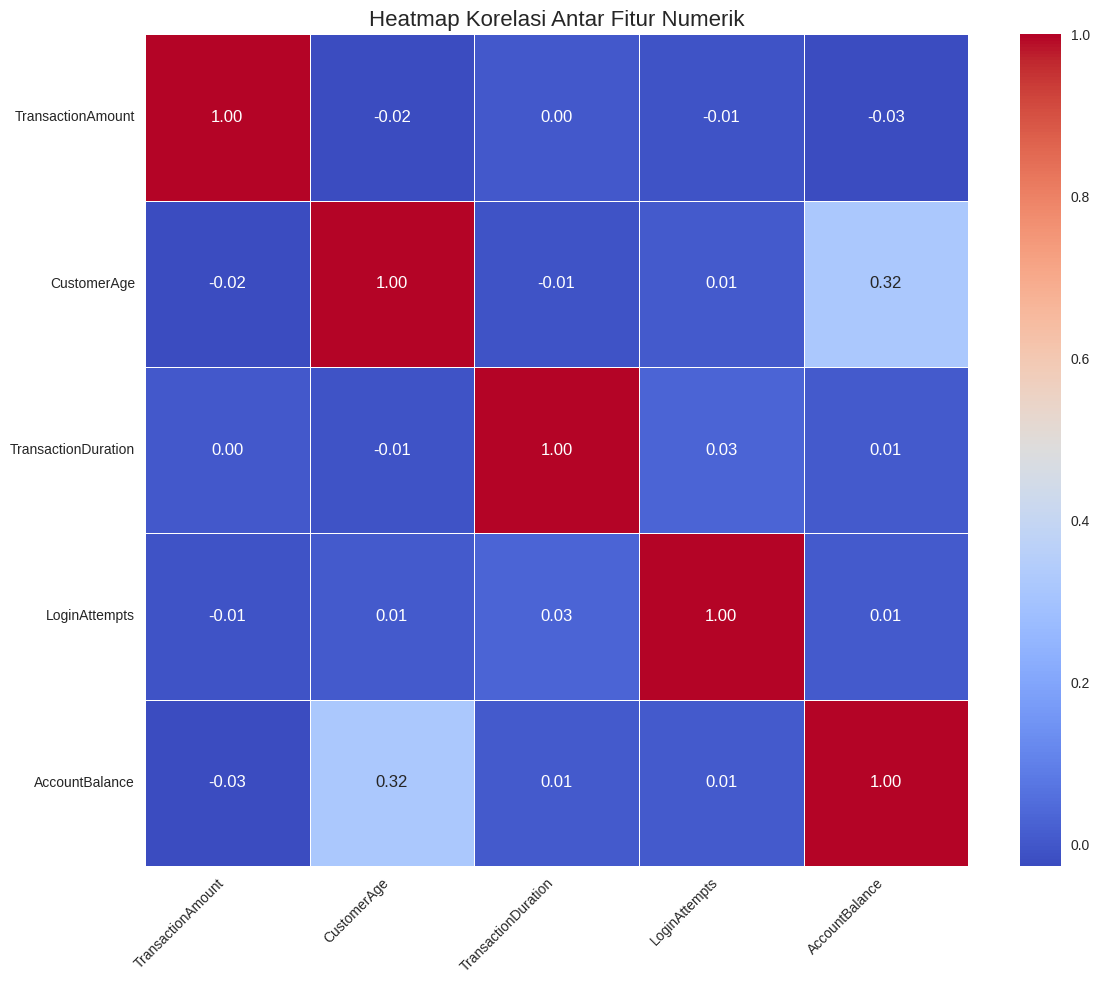

In [6]:
numerical_columns = df.select_dtypes(include=['float64'])
correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=.5)

plt.title('Heatmap Korelasi Antar Fitur Numerik', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

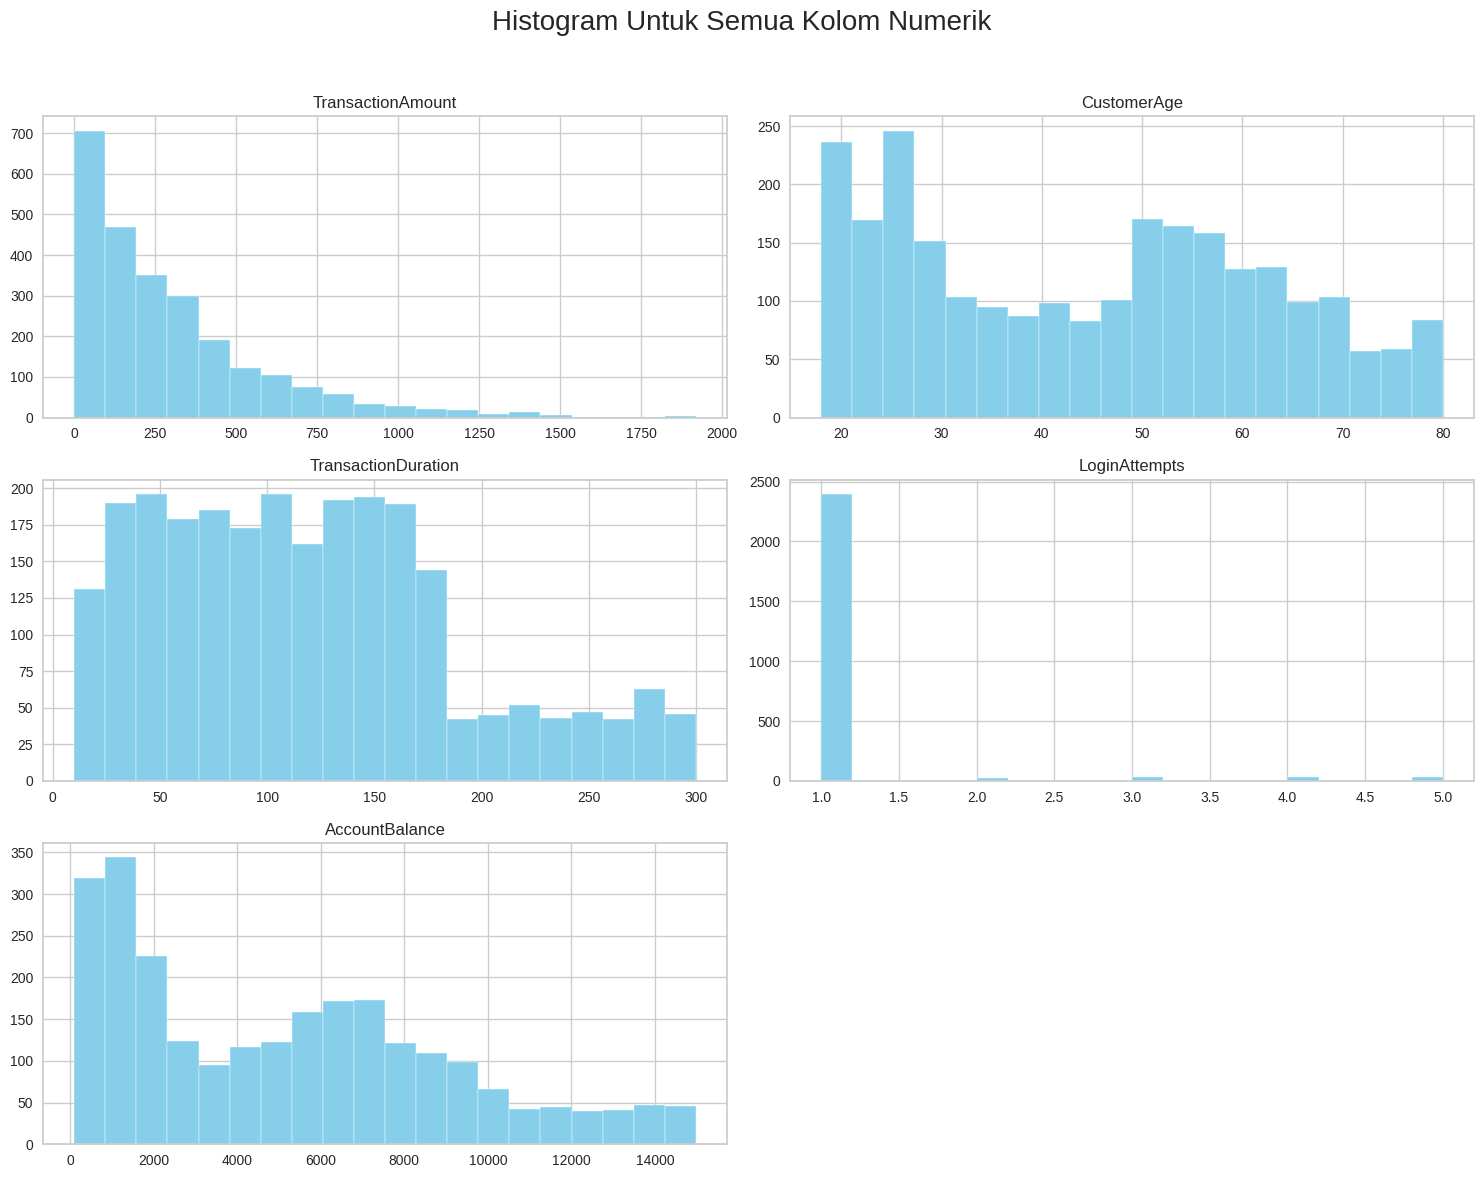


=== Menganalisis Kolom TransactionID (Nilai Unik: 2484) ===
Dilewati: Terlalu banyak nilai unik (>20).

=== Menganalisis Kolom AccountID (Nilai Unik: 495) ===
Dilewati: Terlalu banyak nilai unik (>20).

=== Menganalisis Kolom PreviousTransactionDate (Nilai Unik: 2485) ===
Dilewati: Terlalu banyak nilai unik (>20).

=== Menganalisis Kolom TransactionType (Nilai Unik: 2) ===


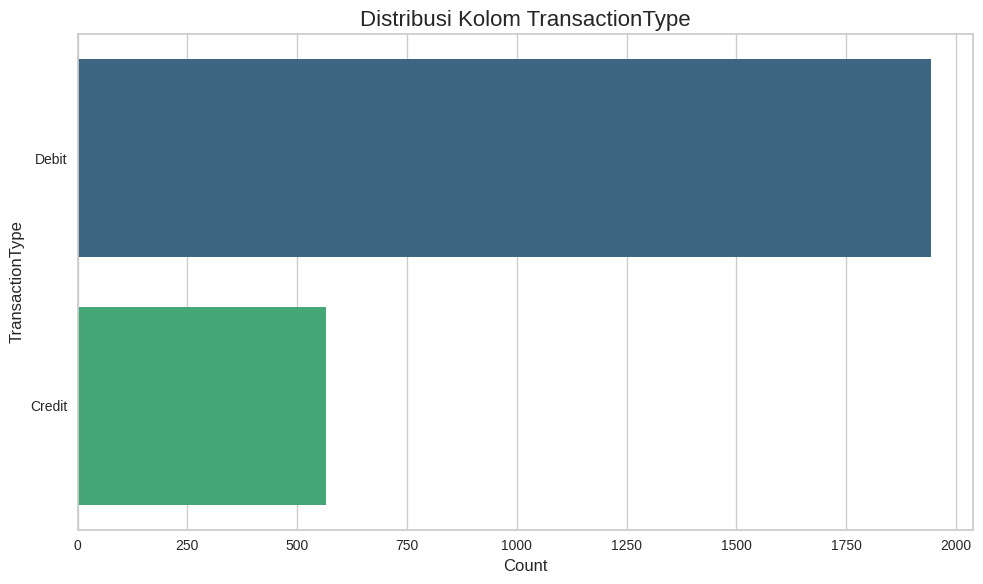


=== Menganalisis Kolom Location (Nilai Unik: 43) ===
Dilewati: Terlalu banyak nilai unik (>20).

=== Menganalisis Kolom DeviceID (Nilai Unik: 681) ===
Dilewati: Terlalu banyak nilai unik (>20).

=== Menganalisis Kolom IP Address (Nilai Unik: 591) ===
Dilewati: Terlalu banyak nilai unik (>20).

=== Menganalisis Kolom MerchantID (Nilai Unik: 100) ===
Dilewati: Terlalu banyak nilai unik (>20).

=== Menganalisis Kolom Channel (Nilai Unik: 3) ===


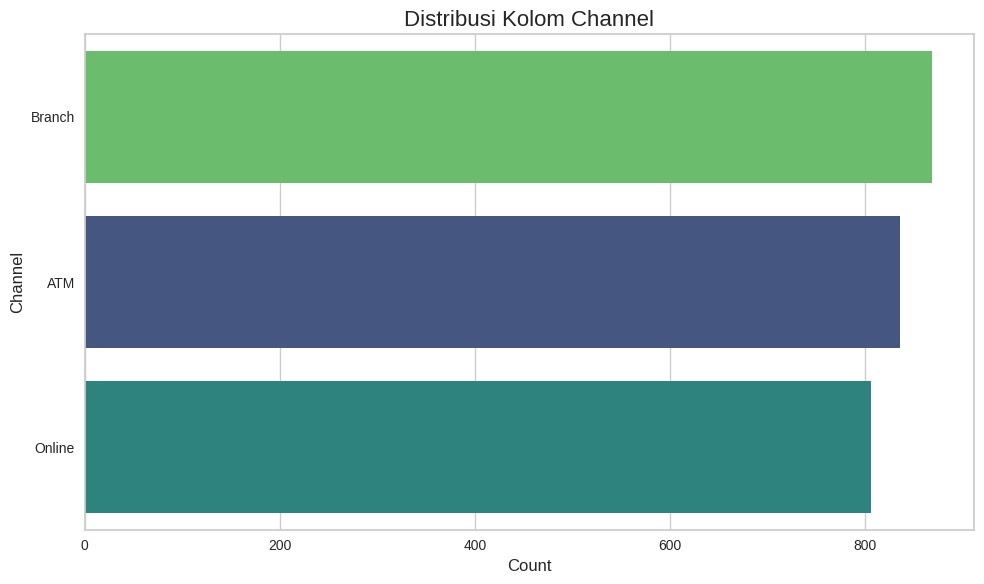


=== Menganalisis Kolom CustomerOccupation (Nilai Unik: 4) ===


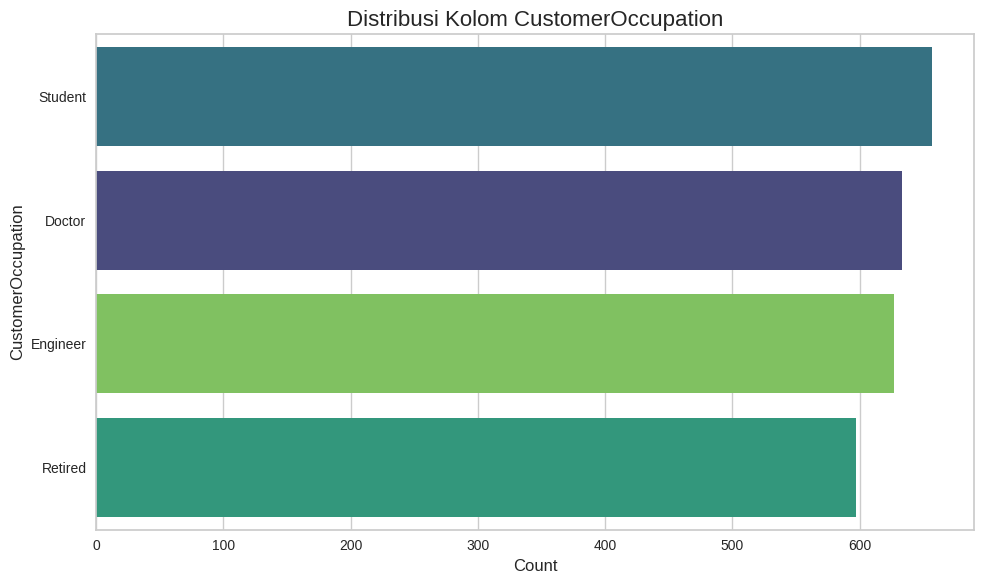


=== Menganalisis Kolom TransactionDate (Nilai Unik: 360) ===
Dilewati: Terlalu banyak nilai unik (>20).


In [7]:
numerical_columns.hist(figsize=(15, 12), bins=20, color="skyblue", edgecolor='azure')

plt.suptitle('Histogram Untuk Semua Kolom Numerik', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

categorical_columns = df.select_dtypes(include=['object'])
max_unique = 20

for col in categorical_columns.columns:
    unique_count = df[col].nunique()

    print(f"\n=== Menganalisis Kolom {col} (Nilai Unik: {unique_count}) ===")

    if unique_count > max_unique:
        print(f"Dilewati: Terlalu banyak nilai unik (>{max_unique}).")
    else:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df,
                      y=col,
                      order=df[col].value_counts().index,
                      palette='viridis',
                      hue=col,
                      legend=False)

        plt.title(f"Distribusi Kolom {col}", fontsize=16)
        plt.ylabel(col, fontsize=12)
        plt.xlabel("Count", fontsize=12)
        plt.tight_layout()
        plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

========= Bivariate Analysis (Numerik vs Kategorikal) =========



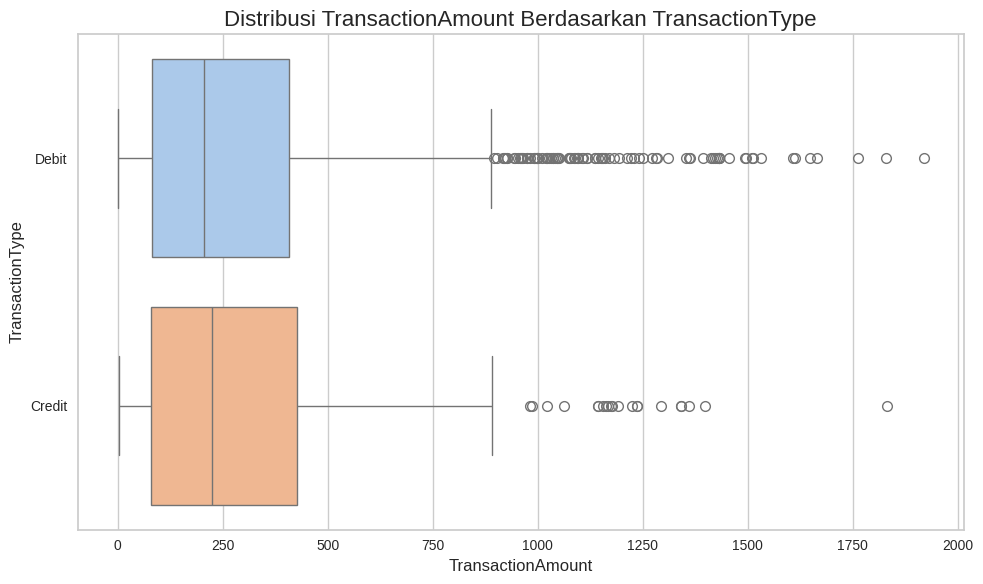

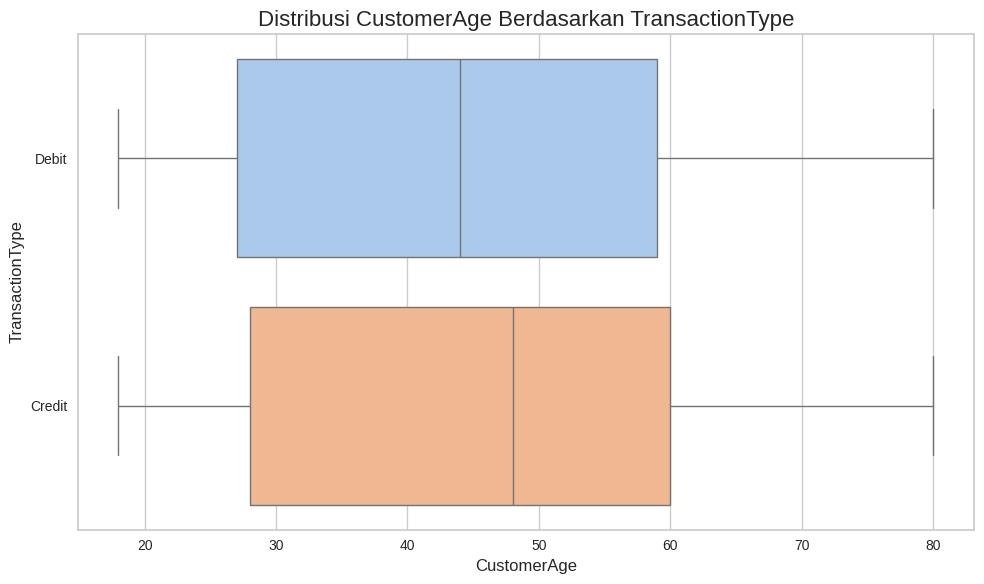

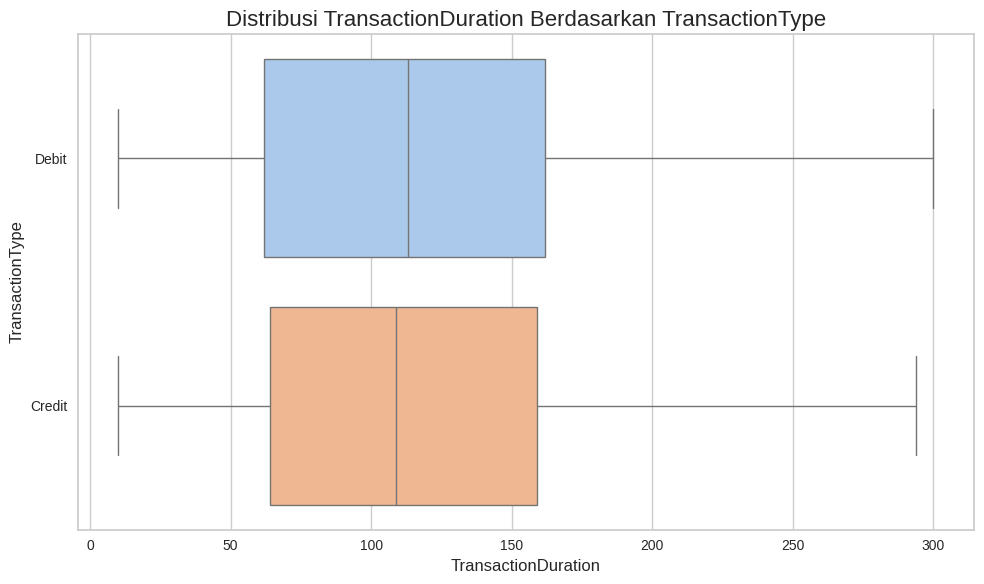

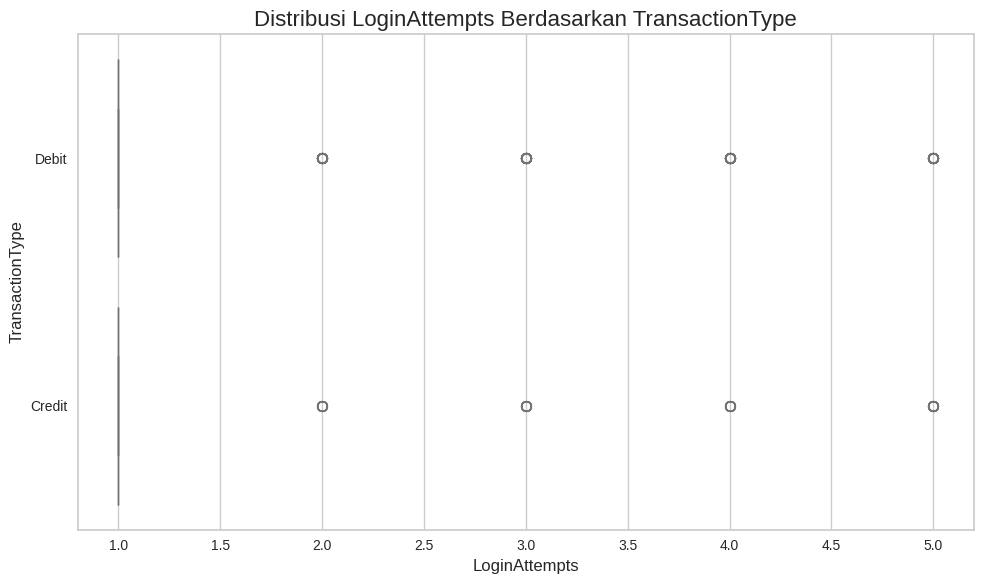

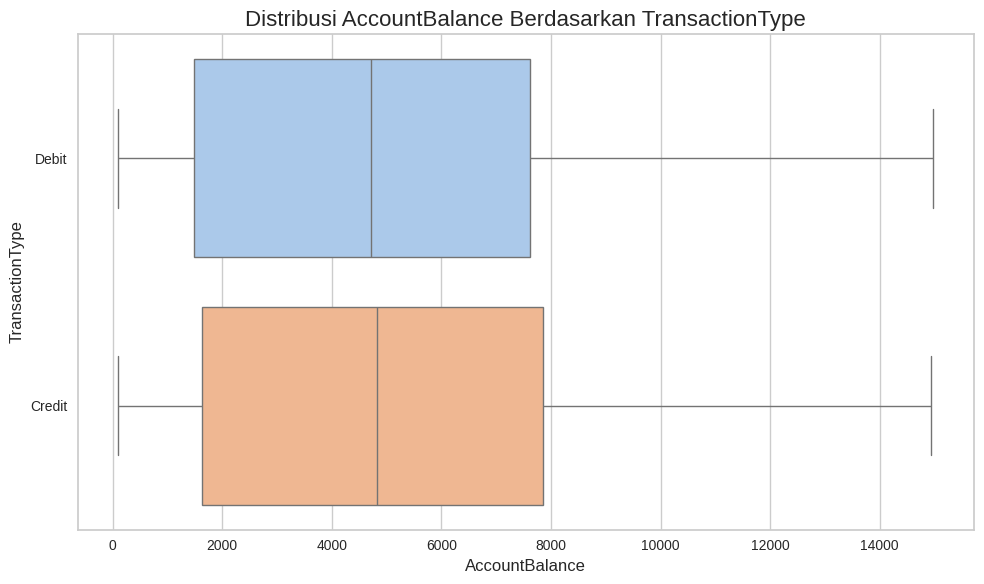

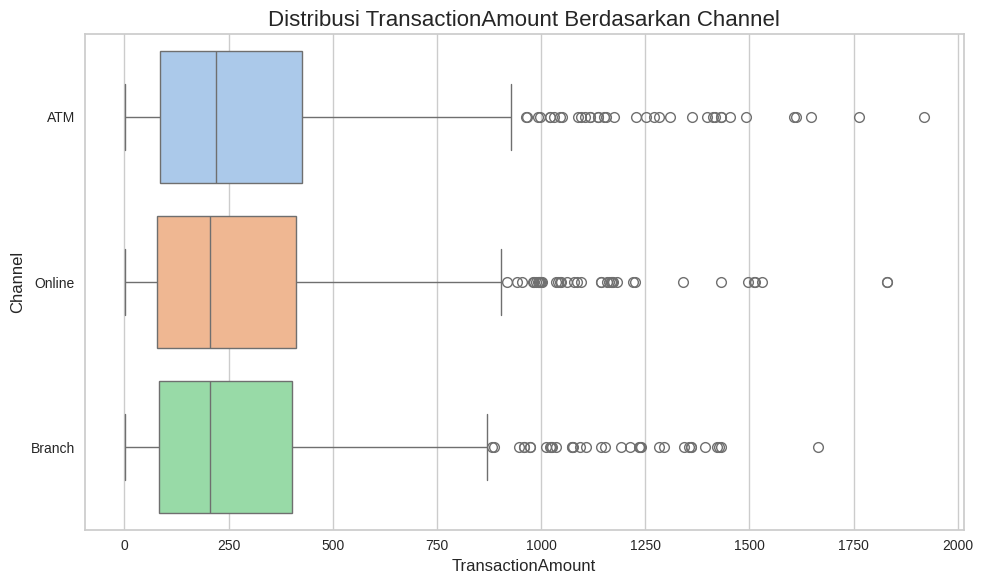

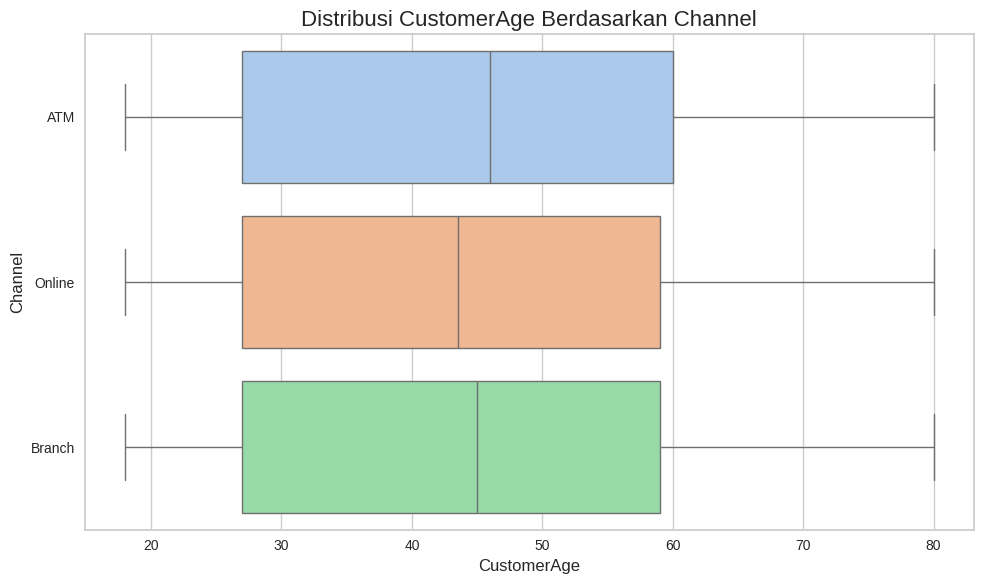

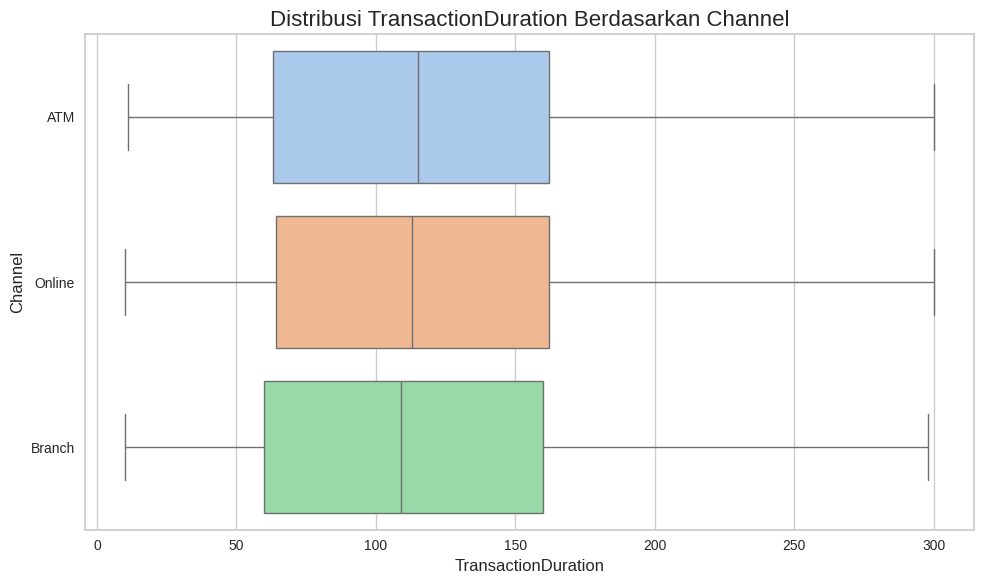

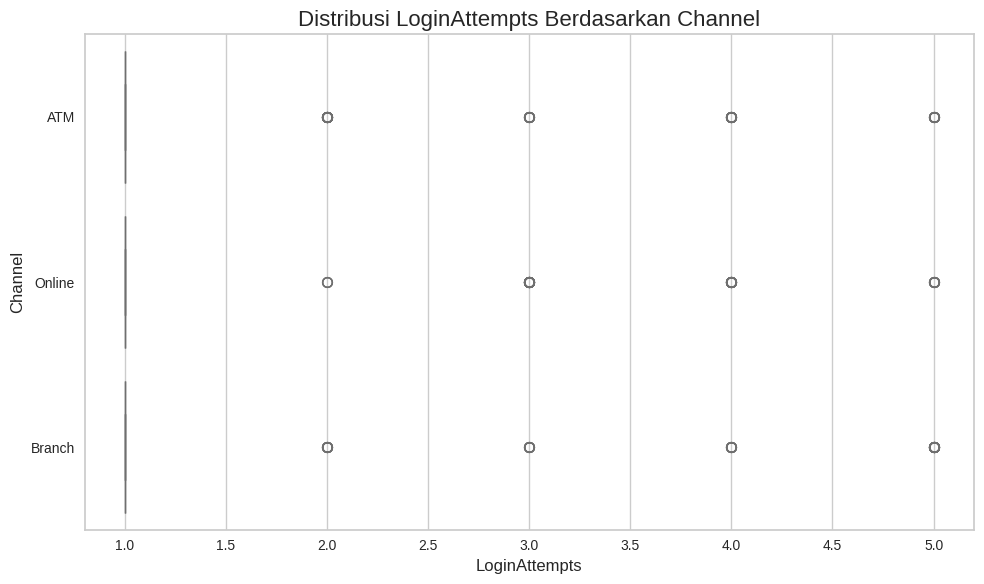

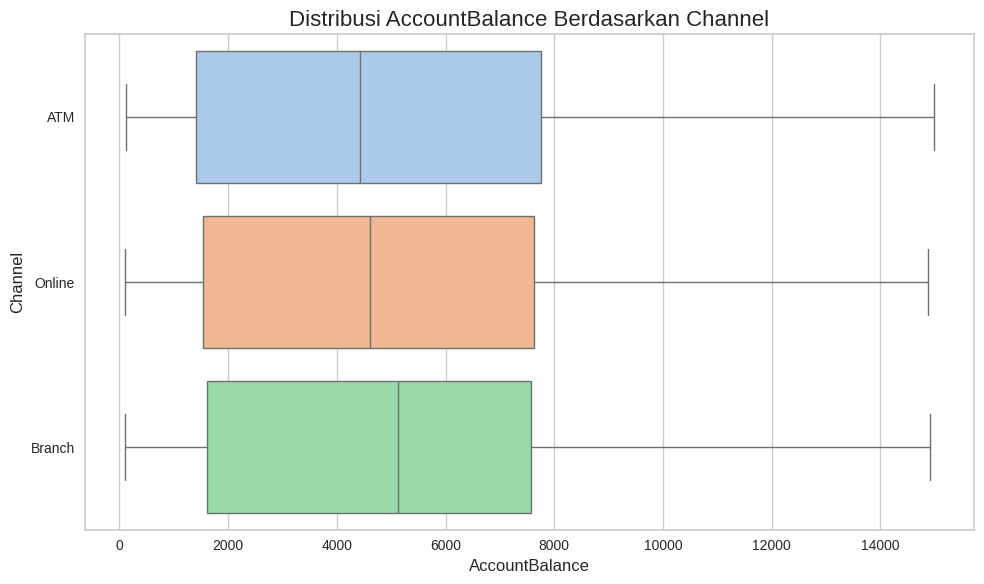

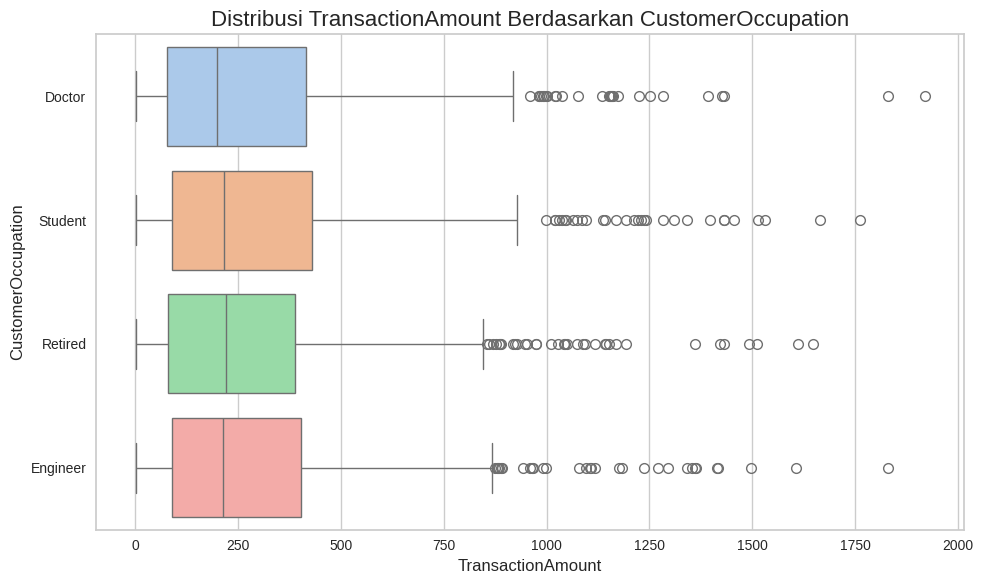

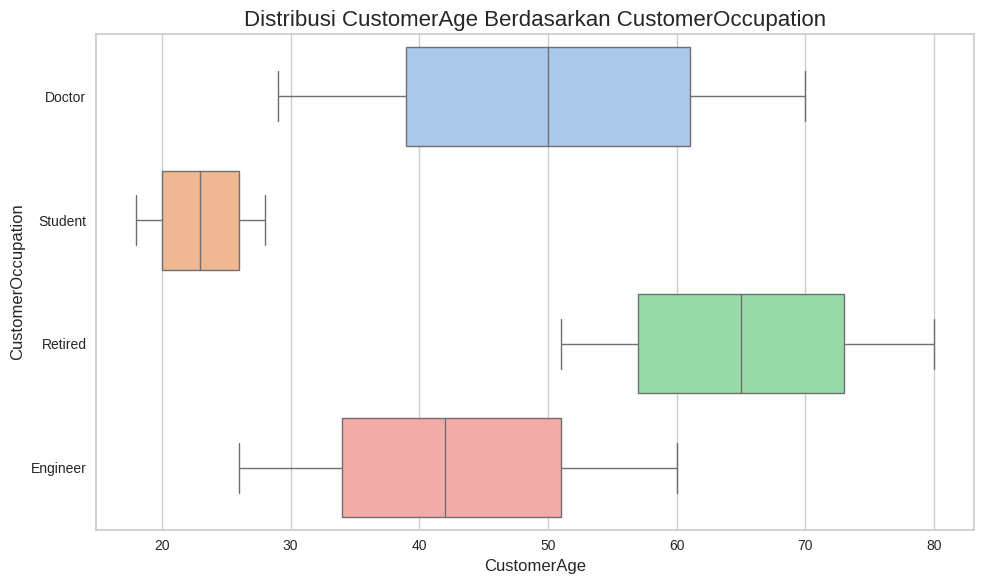

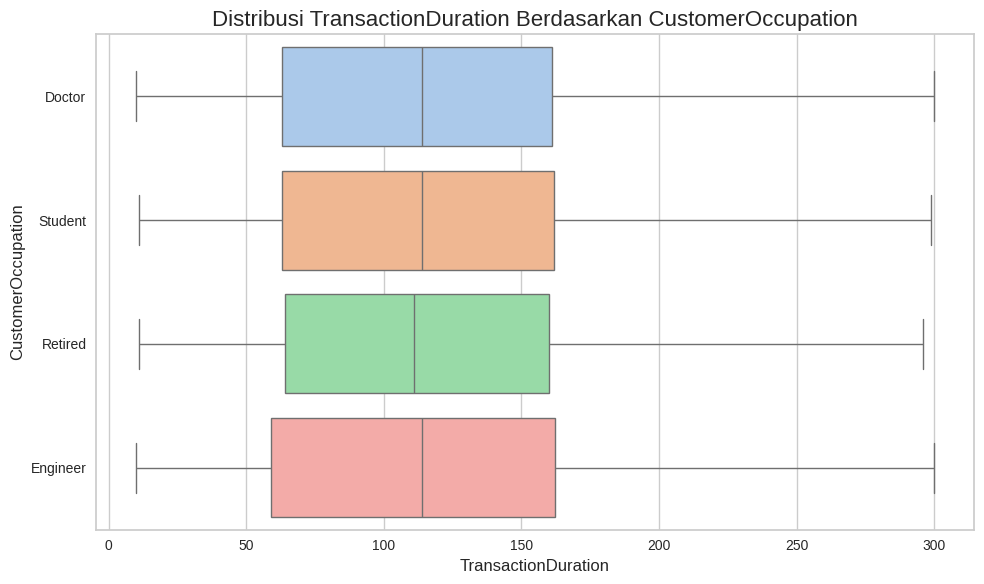

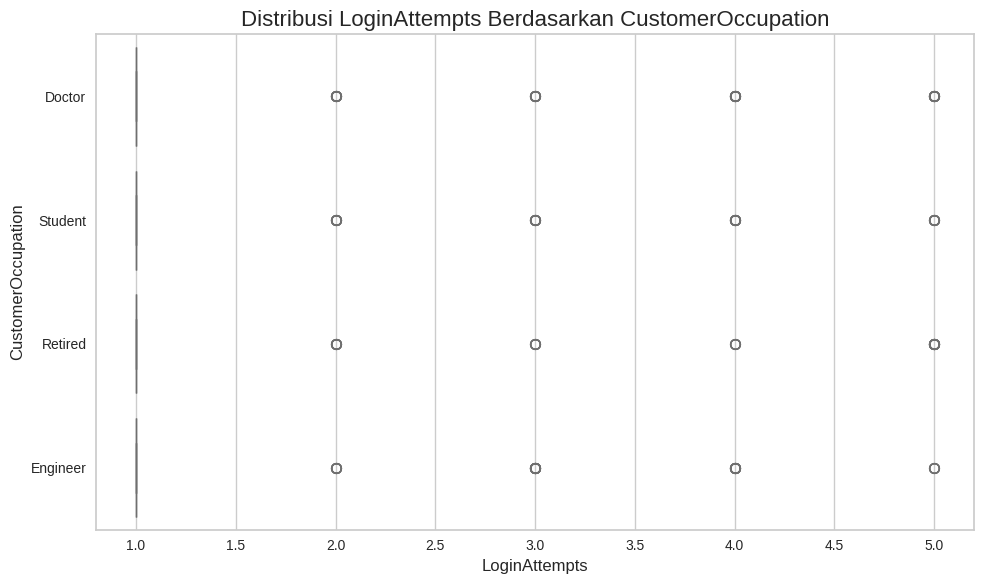

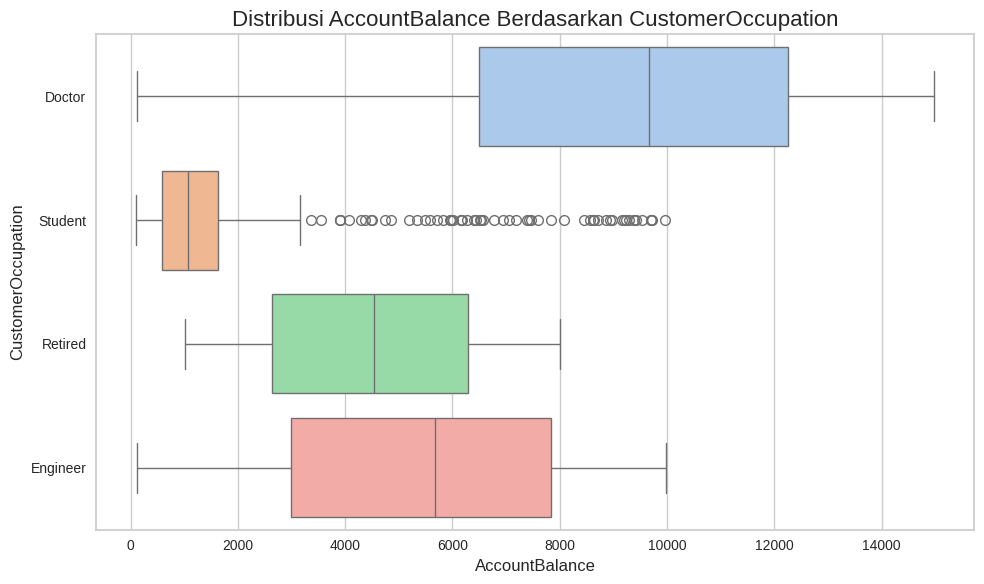


========= Bivariate Analysis (Kategorikal vs Kategorikal) =========



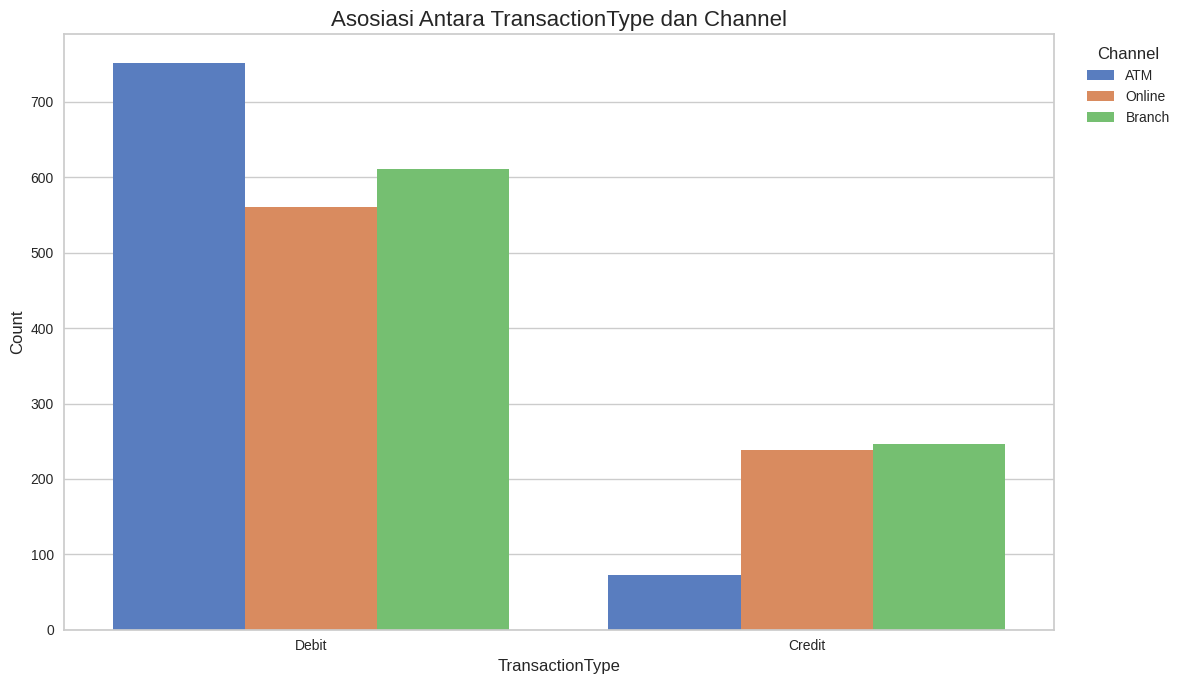

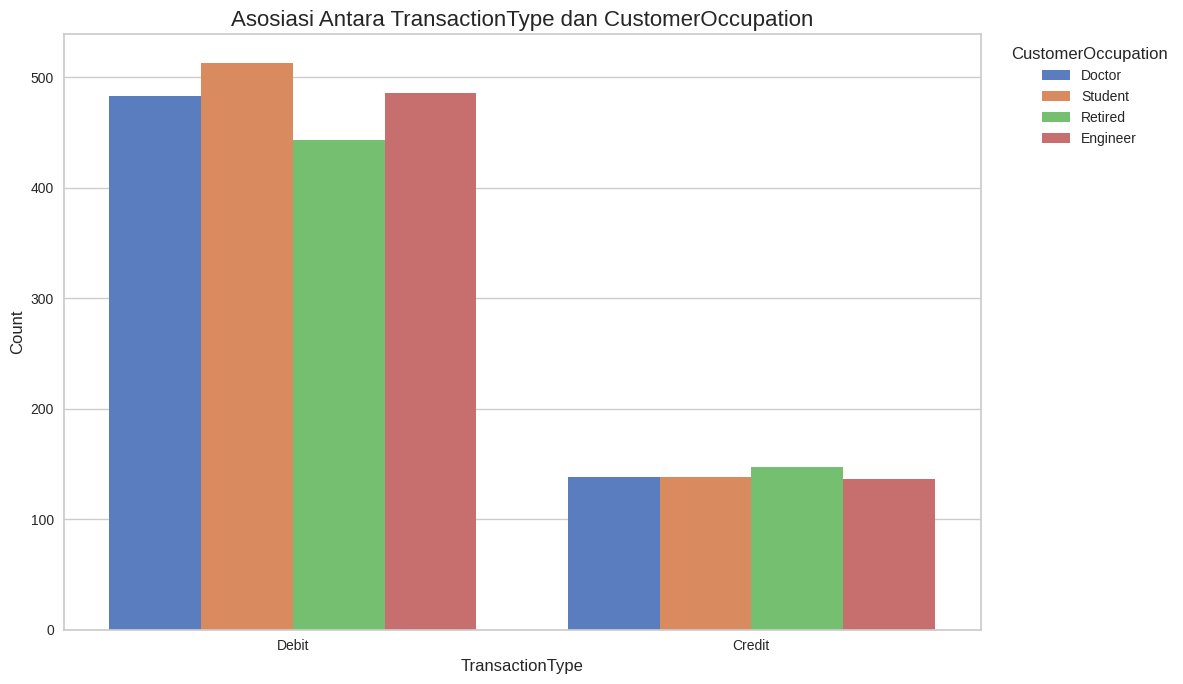

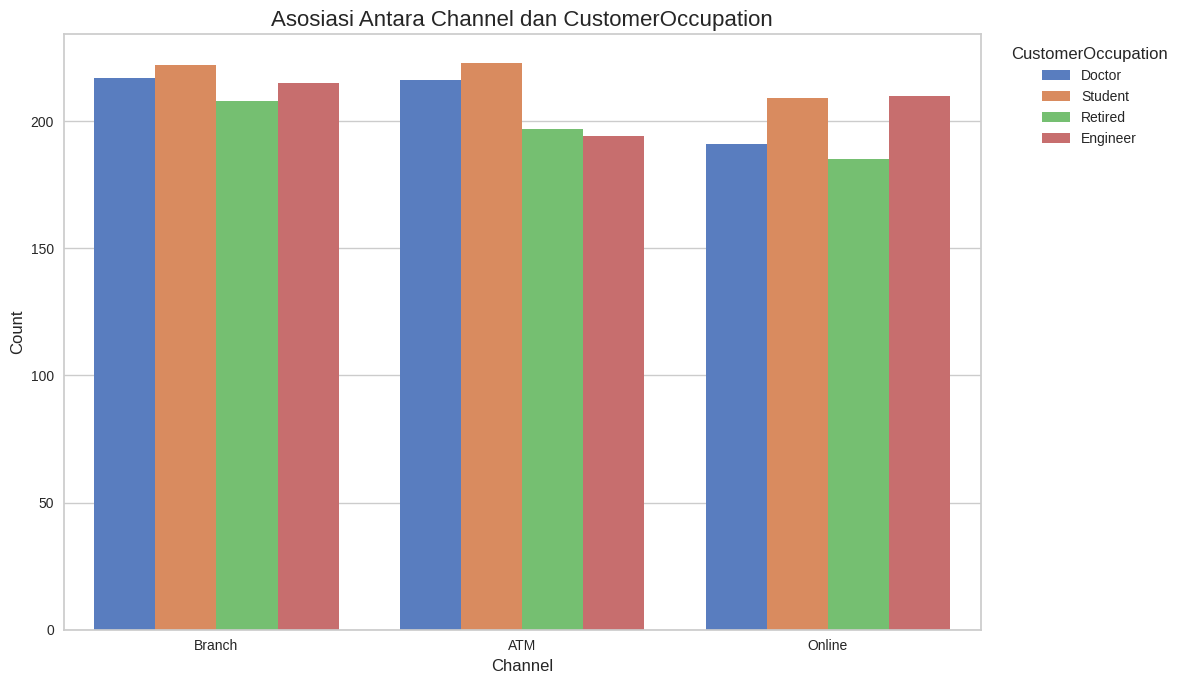


========= Multivariate Analysis (Numerik vs Numerik) =========



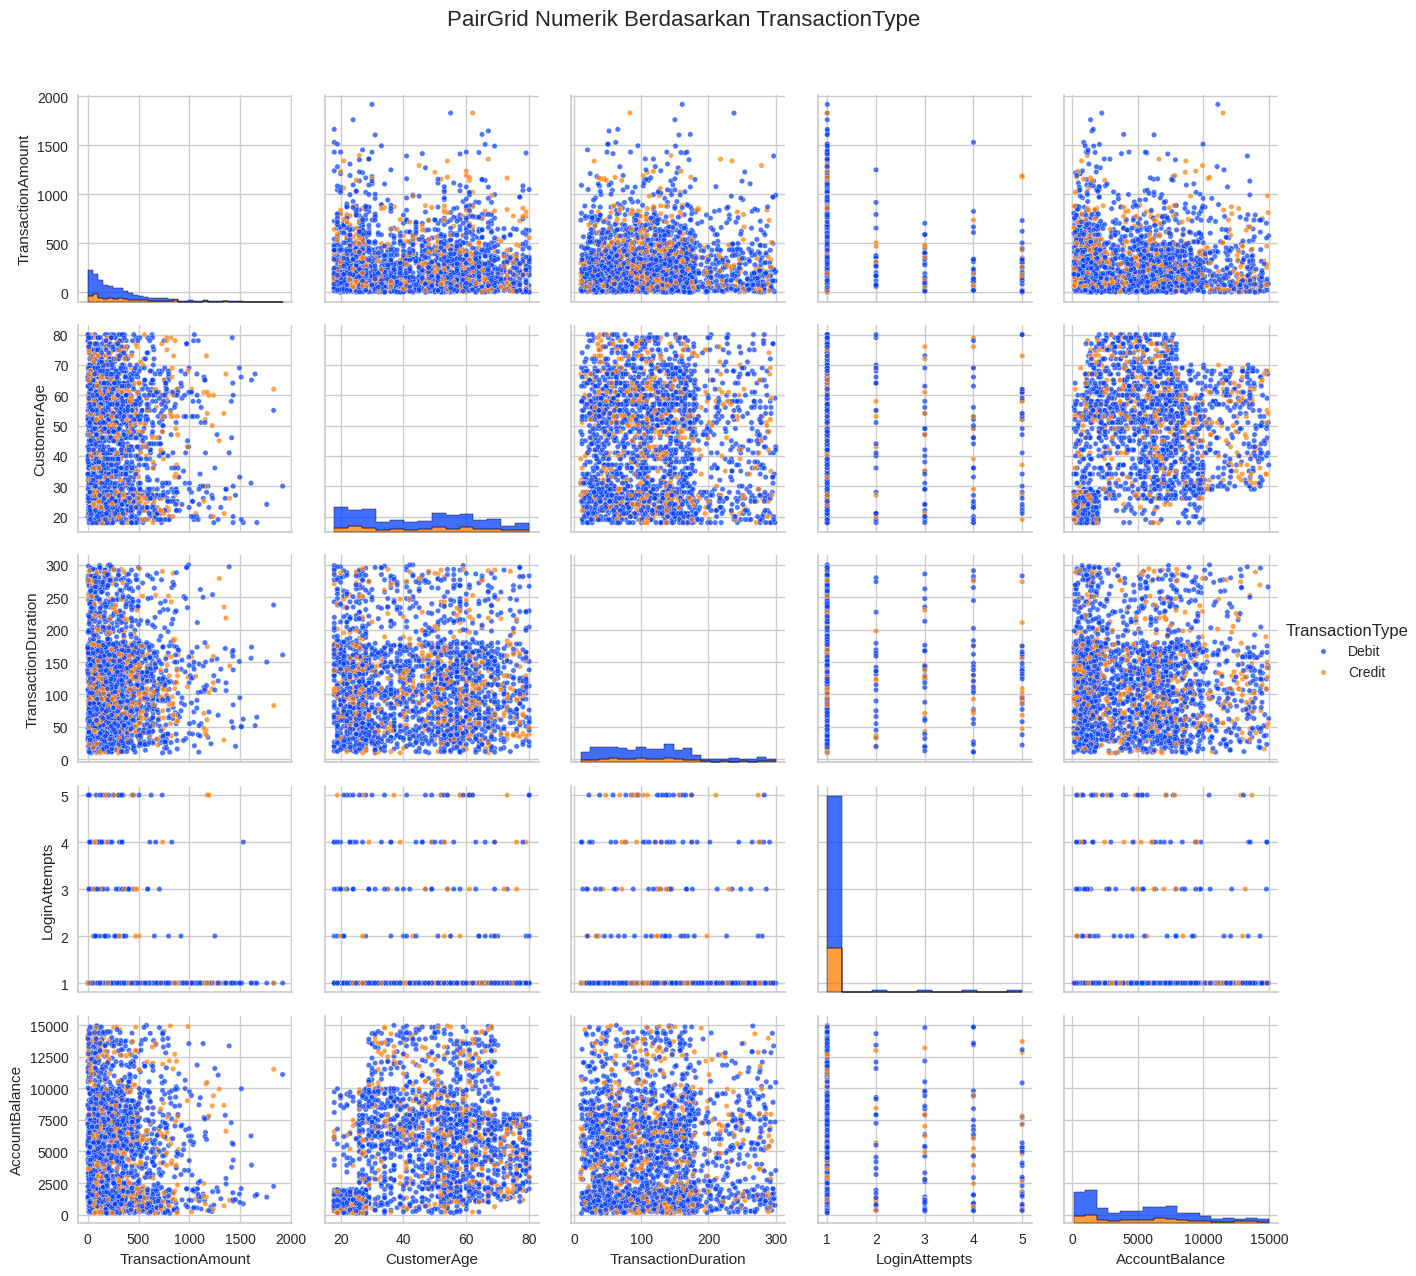

In [8]:
numerical_cols = [
    'TransactionAmount',
    'CustomerAge',
    'TransactionDuration',
    'LoginAttempts',
    'AccountBalance'
]

categorical_cols = [
    'TransactionType',
    'Channel',
    'CustomerOccupation'
]

print("========= Bivariate Analysis (Numerik vs Kategorikal) =========\n")

for cat_col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df,
                    y=cat_col,
                    x=num_col,
                    palette='pastel',
                    hue=cat_col,
                    legend=False)

        plt.title(f"Distribusi {num_col} Berdasarkan {cat_col}", fontsize=16)
        plt.xlabel(num_col, fontsize=12)
        plt.ylabel(cat_col, fontsize=12)
        plt.tight_layout()
        plt.show()

print("\n========= Bivariate Analysis (Kategorikal vs Kategorikal) =========\n")

for col1, col2 in combinations(categorical_cols, 2):
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df,
                  x=col1,
                  hue=col2,
                  palette='muted',
                  order=df[col1].value_counts().index)

    plt.title(f"Asosiasi Antara {col1} dan {col2}", fontsize=16)
    plt.xlabel(col1, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.legend(title=col2, bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

print("\n========= Multivariate Analysis (Numerik vs Numerik) =========\n")

g = sns.PairGrid(df, vars=numerical_cols, hue='TransactionType', palette='bright')
g.map_diag(sns.histplot, multiple="stack", element="step")
g.map_offdiag(sns.scatterplot, s=15, alpha=0.7)
g.add_legend()
g.legend.set_bbox_to_anchor((0.92, 0.5))
g.legend.set_loc('center left')
g.fig.suptitle("PairGrid Numerik Berdasarkan TransactionType", y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [9]:
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
PreviousTransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [10]:
df.duplicated().sum()

np.int64(21)

In [11]:
for col in numerical_cols:
    median_val = df[col].median()

    df[col] = df[col].fillna(median_val)

    print(f"Kolom {col}: Nilai NaN diisi dengan {median_val:.2f}")

print("\n")
print(df[numerical_cols].isnull().sum())
print("\n")

scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df[numerical_cols].head()

Kolom TransactionAmount: Nilai NaN diisi dengan 211.36
Kolom CustomerAge: Nilai NaN diisi dengan 45.00
Kolom TransactionDuration: Nilai NaN diisi dengan 112.00
Kolom LoginAttempts: Nilai NaN diisi dengan 1.00
Kolom AccountBalance: Nilai NaN diisi dengan 4734.11


TransactionAmount      0
CustomerAge            0
TransactionDuration    0
LoginAttempts          0
AccountBalance         0
dtype: int64




,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,-0.972081,1.424796,-0.550102,-0.203745,0.000725
1,0.273272,1.312249,0.310623,-0.203745,2.231209
2,-0.586250,-1.445136,-0.908738,-0.203745,-1.028491
3,-0.386079,-1.051223,-1.353446,-0.203745,0.892446
4,-0.974281,0.017967,1.128313,-0.203745,0.598462


In [12]:
columns_to_drop = [
    'TransactionID',
    'AccountID',
    'PreviousTransactionDate',
    'Location',
    'DeviceID',
    'IP Address',
    'MerchantID',
    'TransactionDate'
]

df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2537 non-null   float64
 1   TransactionType      2507 non-null   object 
 2   Channel              2510 non-null   object 
 3   CustomerAge          2537 non-null   float64
 4   CustomerOccupation   2514 non-null   object 
 5   TransactionDuration  2537 non-null   float64
 6   LoginAttempts        2537 non-null   float64
 7   AccountBalance       2537 non-null   float64
dtypes: float64(5), object(3)
memory usage: 158.7+ KB


In [13]:
fill_value = 'Unknown'

for col in categorical_cols:
    df[col] = df[col].fillna(fill_value)

    le = LabelEncoder()

    df[col] = le.fit_transform(df[col])

print(df[categorical_cols].isnull().sum())
print("\n")

df[categorical_cols].head()

TransactionType       0
Channel               0
CustomerOccupation    0
dtype: int64




,TransactionType,Channel,CustomerOccupation
0,1,0,0
1,1,0,0
2,1,2,3
3,1,2,3
4,0,2,3


In [14]:
df.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [15]:
for col in numerical_cols:
    if col in df.columns:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)

for col in categorical_cols:
    if col in df.columns:
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)

df.isnull().sum()

,0
TransactionAmount,0
TransactionType,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


In [16]:
initial_duplicates = df.duplicated().sum()
print(f"Jumlah data duplikat sebelum dihapus: {initial_duplicates}")

df.drop_duplicates(inplace=True)

final_duplicates = df.duplicated().sum()
print(f"Jumlah data duplikat setelah dihapus: {final_duplicates}\n")

df.info()

Jumlah data duplikat sebelum dihapus: 25
Jumlah data duplikat setelah dihapus: 0

<class 'pandas.core.frame.DataFrame'>
Index: 2512 entries, 0 to 2511
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   TransactionType      2512 non-null   int64  
 2   Channel              2512 non-null   int64  
 3   CustomerAge          2512 non-null   float64
 4   CustomerOccupation   2512 non-null   int64  
 5   TransactionDuration  2512 non-null   float64
 6   LoginAttempts        2512 non-null   float64
 7   AccountBalance       2512 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 176.6 KB


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**


=== Kolom TransactionAmount ===
 Batas Bawah  : -2.42
 Batas Atas   : 2.07
 Total Outlier: 113
 Hasil        : 113 Outlier telah diganti dengan nilai batas

=== Kolom CustomerAge ===
 Batas Bawah  : -3.70
 Batas Atas   : 3.51
 Total Outlier: 0
 Hasil        : 0 Outlier telah diganti dengan nilai batas

=== Kolom TransactionDuration ===
 Batas Bawah  : -2.92
 Batas Atas   : 2.71
 Total Outlier: 0
 Hasil        : 0 Outlier telah diganti dengan nilai batas

=== Kolom LoginAttempts ===
 Batas Bawah  : -0.20
 Batas Atas   : -0.20
 Total Outlier: 120
 Hasil        : 120 Outlier telah diganti dengan nilai batas

=== Kolom AccountBalance ===
 Batas Bawah  : -3.30
 Batas Atas   : 3.02
 Total Outlier: 0
 Hasil        : 0 Outlier telah diganti dengan nilai batas


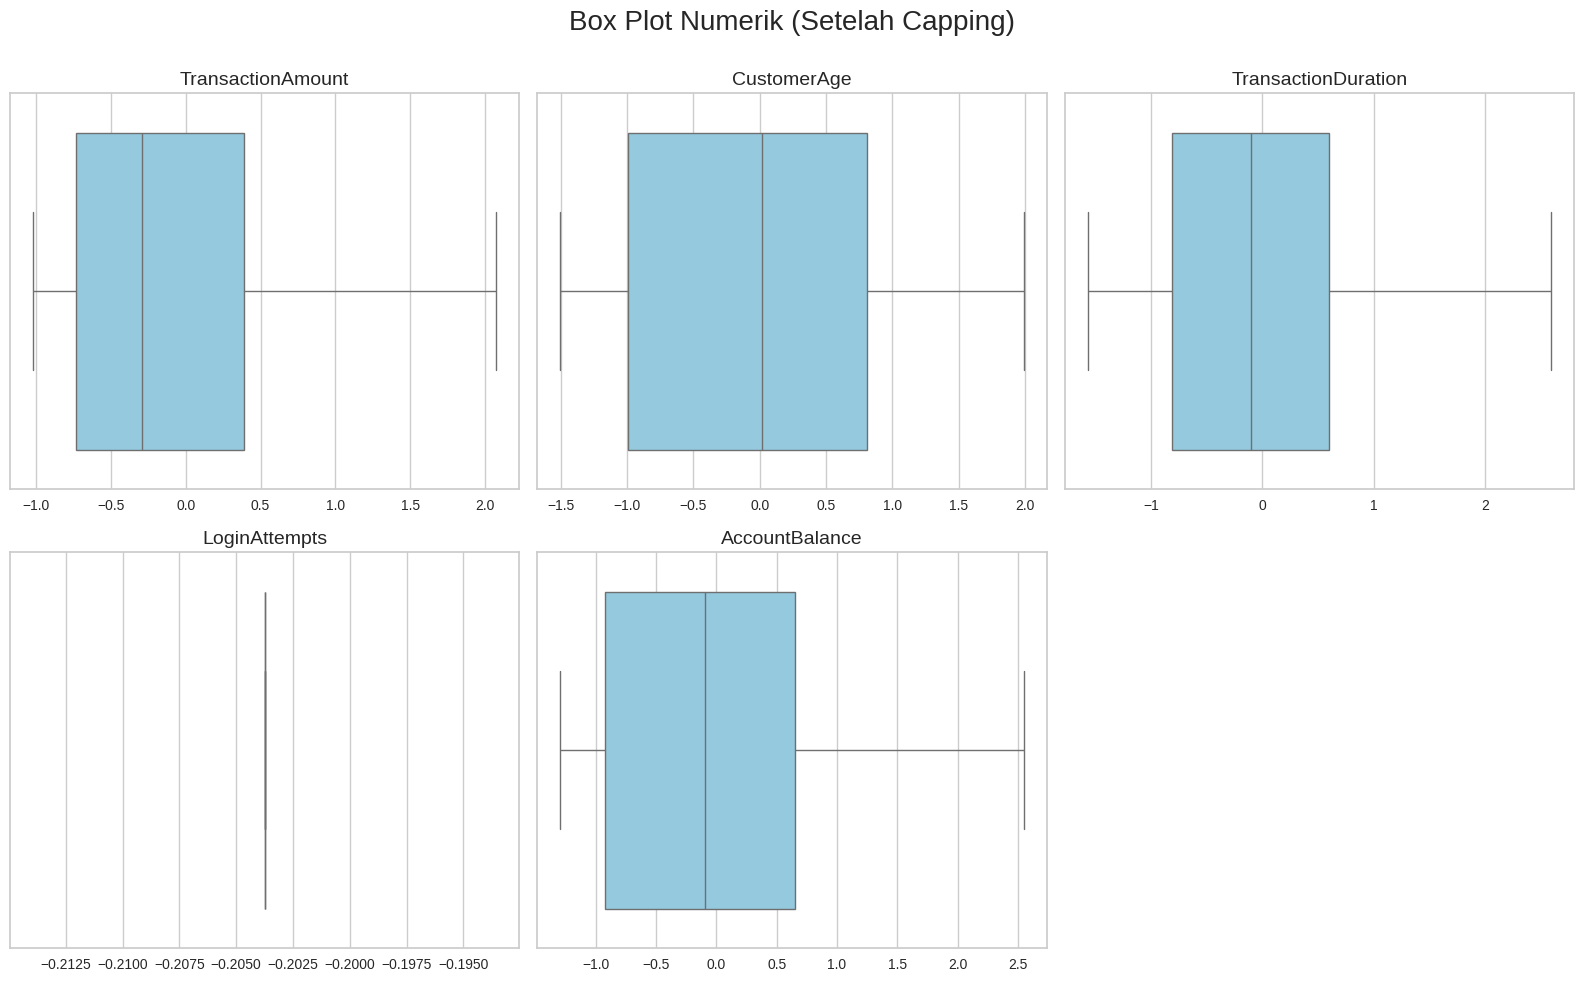

In [17]:
for col in numerical_cols:
    print(f"\n=== Kolom {col} ===")

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_low = (df[col] < lower_bound).sum()
    outliers_high = (df[col] > upper_bound).sum()
    total_outliers = outliers_low + outliers_high

    print(f" Batas Bawah  : {lower_bound:.2f}")
    print(f" Batas Atas   : {upper_bound:.2f}")
    print(f" Total Outlier: {total_outliers}")

    df[col] = np.clip(df[col], lower_bound, upper_bound)

    print(f" Hasil        : {total_outliers} Outlier telah diganti dengan nilai batas")

plt.figure(figsize=(16, 10))
plt.suptitle("Box Plot Numerik (Setelah Capping)", fontsize=20)

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col], color='skyblue')

    plt.title(f"{col}", fontsize=14)
    plt.xlabel('')

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

In [18]:
print("\n=== Binning AccountBalance ===")
balance_labels = ['Low', 'Medium', 'High', 'Very High']

df['BalanceBin'] = pd.qcut(df['AccountBalance'],
                            q=4,
                            labels=balance_labels,
                            duplicates='drop')

print(df['BalanceBin'].value_counts())

print("\n=== Binning TransactionAmount ===")
amount_labels = ['Low', 'Medium', 'High', 'Very High']

df['AmountBin'] = pd.qcut(df['TransactionAmount'],
                           q=4,
                           labels=amount_labels,
                           duplicates='drop')

print(df['AmountBin'].value_counts())

new_binned_columns = ['BalanceBin', 'AmountBin']

for col in new_binned_columns:
    mode_val = df[col].mode()[0]

    df[col] = df[col].fillna(mode_val)

    le_binned = LabelEncoder()

    df[col] = le_binned.fit_transform(df[col])

print("\n")

df.head()


=== Binning AccountBalance ===
BalanceBin
Medium       640
Low          628
Very High    628
High         616
Name: count, dtype: int64

=== Binning TransactionAmount ===
AmountBin
Medium       642
Low          628
Very High    628
High         614
Name: count, dtype: int64




,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,BalanceBin,AmountBin
0,-0.972081,1,0,1.424796,0,-0.550102,-0.203745,0.000725,0,1
1,0.273272,1,0,1.312249,0,0.310623,-0.203745,2.231209,3,0
2,-0.586250,1,2,-1.445136,3,-0.908738,-0.203745,-1.028491,1,2
3,-0.386079,1,2,-1.051223,3,-1.353446,-0.203745,0.892446,3,2
4,-0.974281,0,2,0.017967,3,1.128313,-0.203745,0.598462,0,1


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [19]:
df.describe()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,BalanceBin,AmountBin
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2.512000e+03,2512.000000,2512.000000,2512.000000
mean,-0.045061,0.788217,1.011146,-0.002643,1.529857,0.002391,-2.037454e-01,0.001088,1.509554,1.511146
std,0.858793,0.436913,0.830926,0.998548,1.150513,0.999243,1.171518e-14,1.000552,1.113934,1.113204
min,-1.019639,0.000000,0.000000,-1.501409,0.000000,-1.568628,-2.037454e-01,-1.291892,0.000000,0.000000
25%,-0.734642,1.000000,0.000000,-0.994950,0.000000,-0.808320,-2.037454e-01,-0.926076,1.000000,1.000000
50%,-0.293713,1.000000,1.000000,0.017967,2.000000,-0.105394,-2.037454e-01,-0.096809,2.000000,2.000000
75%,0.388704,1.000000,2.000000,0.805791,3.000000,0.597532,-2.037454e-01,0.653459,2.250000,2.250000
max,2.073721,2.000000,3.000000,1.987527,4.000000,2.591547,-2.037454e-01,2.545681,3.000000,3.000000


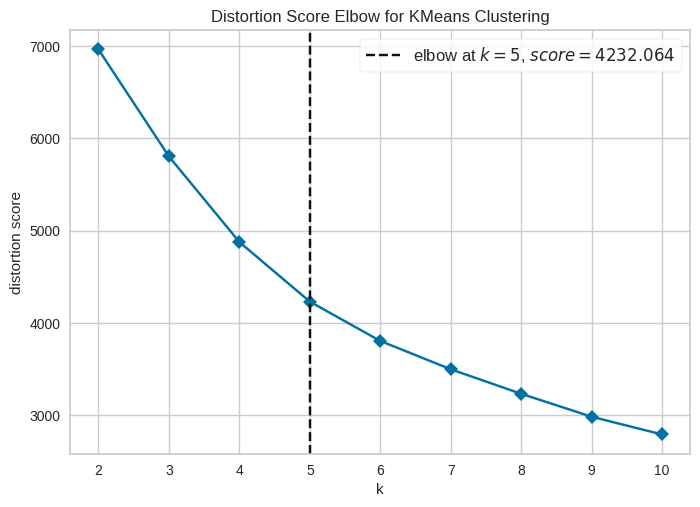

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
x = df[numerical_cols]

kmeans_model = KMeans(n_init=10, random_state=42, init='k-means++')

visualizer = KElbowVisualizer(
    kmeans_model,
    k=(2, 11),
    metric='distortion',
    timings=False
)

visualizer.fit(x)
visualizer.show()

In [21]:
optimal_k = 5

kmeans_final = KMeans(
    n_clusters=optimal_k,
    n_init=10,
    random_state=42,
    init='k-means++'
)

cluster_labels = kmeans_final.fit_predict(x)

df['Cluster'] = cluster_labels
df['Cluster'].value_counts().sort_index()

,count
Cluster,
0,668
1,361
2,517
3,637
4,329


Jalankan cell code ini untuk menyimpan model kamu.

In [22]:
joblib.dump(kmeans_final, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [23]:
x_data = df[numerical_cols]

cluster_labels = df['Cluster']

score = silhouette_score(x_data, cluster_labels)

print(f"Nilai Silhouette Score untuk k={optimal_k}: {score:.4f}")

Nilai Silhouette Score untuk k=5: 0.2599


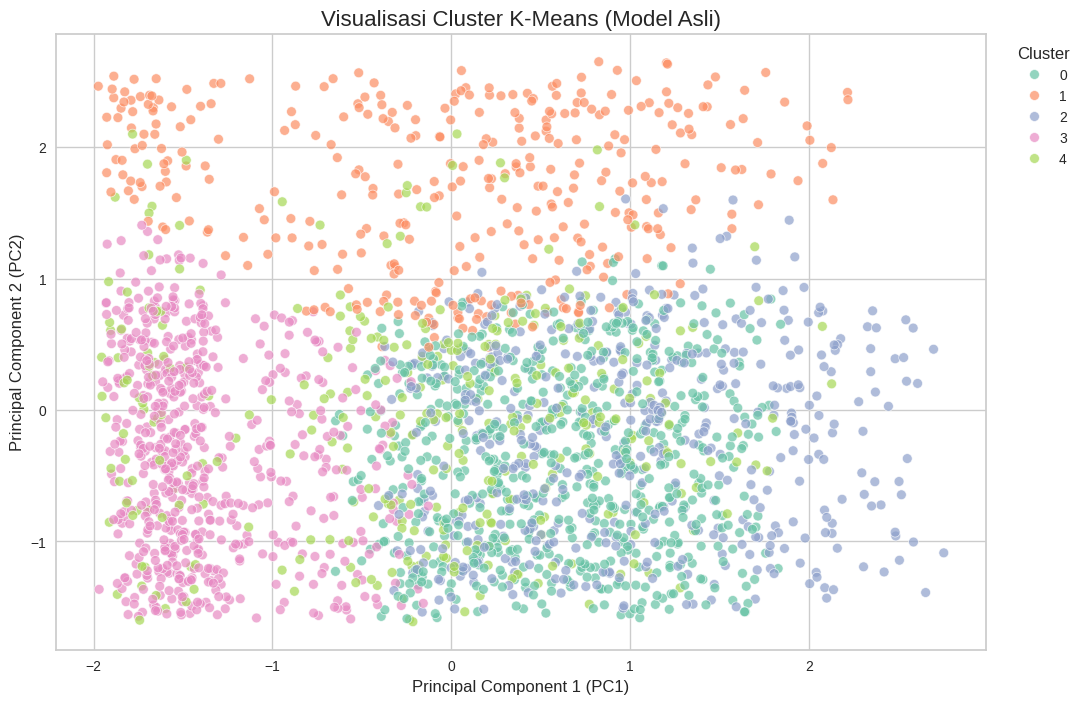

In [24]:
x_features_viz = df[numerical_cols]

pca_viz = PCA(n_components=2, random_state=42)

pca_components = pca_viz.fit_transform(x_features_viz)

pca_df_viz = pd.DataFrame(
    data=pca_components,
    columns=['PC1', 'PC2']
)

pca_df_viz['Cluster'] = df['Cluster'].values

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=pca_df_viz,
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette='Set2',
    s=50,
    alpha=0.7
)

plt.title('Visualisasi Cluster K-Means (Model Asli)', fontsize=16)
plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
plt.ylabel('Principal Component 2 (PC2)', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(True)
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

       PCA1      PCA2
0  1.060524 -0.572258
1  2.483391  0.391136
2 -1.699311 -0.936208
3 -0.061102 -1.297912
4  0.455621  1.152134


ClusterPCA
0    369
1    414
2    560
3    655
4    514
Name: count, dtype: int64


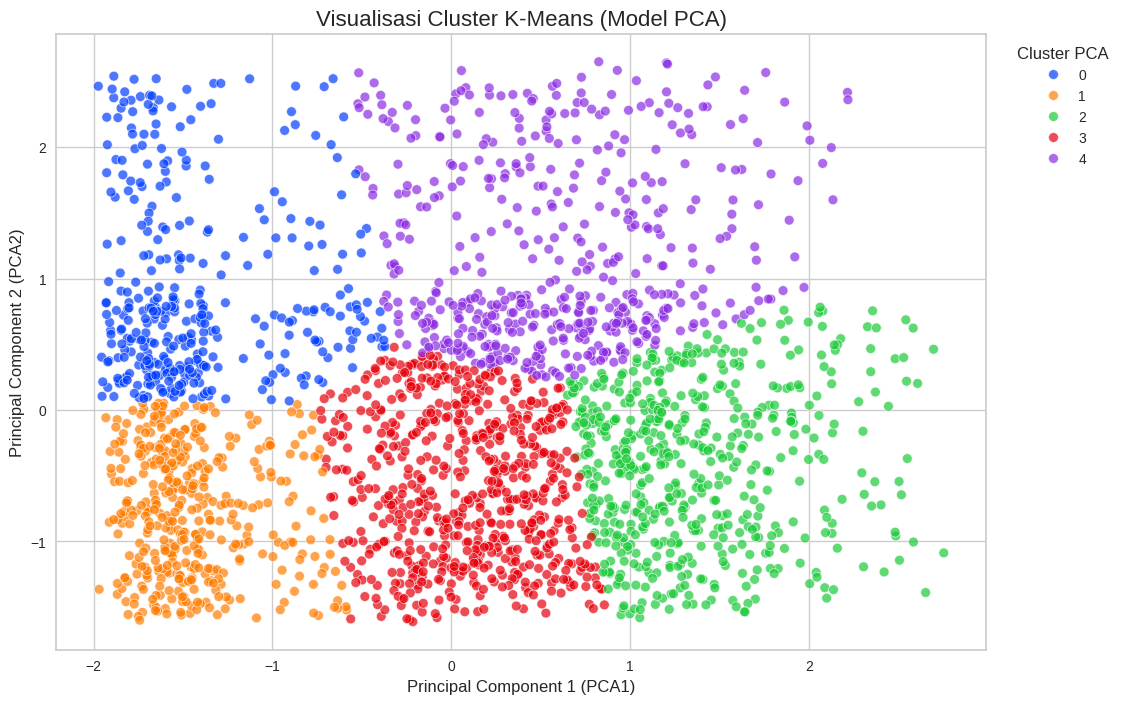

In [25]:
x_features_model = df[numerical_cols]

n_pca_components = 2
pca_model = PCA(n_components=n_pca_components, random_state=42)

pca_data = pca_model.fit_transform(x_features_model)

pca_column_names = [f'PCA{i+1}' for i in range(n_pca_components)]
pca_df_model = pd.DataFrame(pca_data, columns=pca_column_names)

print(pca_df_model.head())

kmeans_pca_model = KMeans(
    n_clusters=optimal_k,
    n_init=10,
    random_state=42,
    init='k-means++'
)

kmeans_pca_model.fit(pca_df_model)

pca_cluster_labels = kmeans_pca_model.labels_

pca_df_model['ClusterPCA'] = pca_cluster_labels

print("\n")
print(pca_df_model['ClusterPCA'].value_counts().sort_index())

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=pca_df_model,
    x='PCA1',
    y='PCA2',
    hue='ClusterPCA',
    palette='bright',
    s=50,
    alpha=0.7
)

plt.title('Visualisasi Cluster K-Means (Model PCA)', fontsize=16)
plt.xlabel('Principal Component 1 (PCA1)', fontsize=12)
plt.ylabel('Principal Component 2 (PCA2)', fontsize=12)
plt.legend(title='Cluster PCA', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(True)
plt.show()

In [26]:
joblib.dump(kmeans_pca_model, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [27]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

label_mappings = {}

label_mappings['BalanceBin'] = {
    0: 'High',
    1: 'Low',
    2: 'Medium',
    3: 'Very High'
}

label_mappings['AmountBin'] = {
    0: 'High',
    1: 'Low',
    2: 'Medium',
    3: 'Very High'
}

label_mappings['TransactionType'] = {
    0: 'Credit',
    1: 'Debit',
    2: 'Unknown'
}

label_mappings['Channel'] = {
    0: 'ATM',
    1: 'Branch',
    2: 'Online',
    3: 'Unknown'
}

label_mappings['CustomerOccupation'] = {
    0: 'Doctor',
    1: 'Engineer',
    2: 'Retired',
    3: 'Student',
    4: 'Unknown'
}

categorical_analysis_cols = [
    'TransactionType',
    'Channel',
    'CustomerOccupation',
    'BalanceBin',
    'AmountBin'
]

aggregations_to_run = ['mean', 'min', 'max', 'median', 'std']

print("=== Agregasi Keseluruhan (Numerik) ===")

display(df[numerical_cols].describe())

print("\n=== Agregasi Berdasarkan Cluster (Numerik) ===")

cluster_analysis = df.groupby('Cluster')[numerical_cols].agg(aggregations_to_run)
display(cluster_analysis)

print("\n=== Agregasi Berdasarkan Cluster (Kategorikal) ---")

for col in categorical_analysis_cols:
    print("\n")

    crosstab_analysis = pd.crosstab(
        df['Cluster'],
        df[col],
        normalize='index'
    )

    crosstab_analysis = crosstab_analysis.rename(columns=label_mappings[col])

    display(crosstab_analysis.mul(100).round(2))

=== Agregasi Keseluruhan (Numerik) ===


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2.512000e+03,2512.000000
mean,-0.045061,-0.002643,0.002391,-2.037454e-01,0.001088
std,0.858793,0.998548,0.999243,1.171518e-14,1.000552
min,-1.019639,-1.501409,-1.568628,-2.037454e-01,-1.291892
25%,-0.734642,-0.994950,-0.808320,-2.037454e-01,-0.926076
50%,-0.293713,0.017967,-0.105394,-2.037454e-01,-0.096809
75%,0.388704,0.805791,0.597532,-2.037454e-01,0.653459
max,2.073721,1.987527,2.591547,-2.037454e-01,2.545681



=== Agregasi Berdasarkan Cluster (Numerik) ===


TransactionAmount                                         CustomerAge                                         TransactionDuration                                         LoginAttempts                                    AccountBalance                                        
                     mean       min       max    median       std        mean       min       max    median       std                mean       min       max    median       std          mean       min       max    median  std           mean       min       max    median       std
Cluster                                                                                                                                                                                                                                                                                  
0               -0.373300 -1.017644  1.189500 -0.491254  0.503638    0.985562 -0.263399  1.987527  0.974610  0.545748           -0.380985 -1.568628  1.214385 -0.392303  0.668439     -0.203745 -0.203745 -0.203745 -0.203745  0.0      -0.132006 -1.286826  1.022486 -0.096977  0.564267
1               -0.235241 -1.016372  2.073721 -0.354992  0.654887    0.012511 -1.501409  1.987527  0.017967  0.923766            1.712502  0.468423  2.591547  1.788203  0.580729     -0.203745 -0.203745 -0.203745 -0.203745  0.0       0.023842 -1.282939  2.532876  0.035219  0.877351
2               -0.249009 -1.019432  2.073721 -0.424077  0.634176    0.009259 -1.501409  1.424796 -0.038307  0.696253           -0.277789 -1.568628  1.515639 -0.234503  0.721758     -0.203745 -0.203745 -0.203745 -0.203745  0.0       1.356878  0.146551  2.545681  1.221410  0.637271
3               -0.276386 -1.019639  1.598886 -0.399971  0.579503   -1.066771 -1.501409  0.130513 -1.107497  0.338856           -0.307401 -1.568628  1.443912 -0.306230  0.738019     -0.203745 -0.203745 -0.203745 -0.203745  0.0      -0.898473 -1.291892  0.499829 -1.026193  0.393104
4                1.598442  0.308142  2.073721  1.709443  0.487511    0.015914 -1.501409  1.987527  0.130513  0.957570           -0.055556 -1.568628  2.146838 -0.048012  0.811154     -0.203745 -0.203745 -0.203745 -0.203745  0.0      -0.142473 -1.291647  2.174260 -0.146884  0.840763


=== Agregasi Berdasarkan Cluster (Kategorikal) ---




TransactionType,Credit,Debit,Unknown
Cluster,,,
0,23.35,75.60,1.05
1,19.67,78.95,1.39
2,23.40,75.24,1.35
3,20.88,77.71,1.41
4,24.62,74.77,0.61


Channel,ATM,Branch,Online,Unknown
Cluster,,,,
0,34.43,32.78,31.44,1.35
1,32.69,35.73,31.30,0.28
2,31.91,34.24,32.50,1.35
3,31.87,35.79,31.55,0.78
4,33.43,32.22,32.83,1.52


CustomerOccupation,Doctor,Engineer,Retired,Student,Unknown
Cluster,,,,,
0,14.67,21.11,62.28,0.00,1.95
1,26.32,30.75,22.44,19.94,0.55
2,64.22,30.75,0.97,3.68,0.39
3,5.02,18.21,0.00,75.98,0.78
4,21.88,28.27,26.44,23.10,0.30


BalanceBin,High,Low,Medium,Very High
Cluster,,,,
0,41.92,9.73,41.92,6.44
1,32.41,18.84,25.48,23.27
2,15.09,0.00,0.00,84.91
3,7.85,64.52,27.63,0.00
4,27.66,25.53,27.96,18.84


AmountBin,High,Low,Medium,Very High
Cluster,,,,
0,29.94,32.04,29.34,8.68
1,28.81,27.70,27.70,15.79
2,25.15,26.31,30.75,17.79
3,27.94,27.94,29.36,14.76
4,0.61,0.00,0.00,99.39


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.

### 🟦 Cluster 0 — Nasabah Senior Konservatif

🎯 **Numerik:**  
- **TransactionAmount:** Mean: -0.373300 | Min: -1.017644 | Max: 1.189500 | Median: -0.491254 | Std: 0.503638
- **CustomerAge:** Mean: 0.985562 | Min: -0.263399 | Max: 1.987527 | Median: 0.974610 | Std: 0.545748
- **TransactionDuration:** Mean: -0.380985 | Min: -1.568628 | Max: 1.214385 | Median: -0.392303 | Std: 0.668439
- **LoginAttempts:** Mean: -0.203745 | Min: -0.203745 | Max: -0.203745 | Median: -0.203745 | Std: 0.0
- **AccountBalance:** Mean: -0.132006 | Min: -1.286826 | Max: 1.022486 | Median: -0.096977 | Std: 0.564267

🗂️ **Kategorikal:**
- **TransactionType:** Credit: 23.35 | Debit: 75.60 | Unknown: 1.05
- **Channel:** ATM: 34.43 | Branch: 32.78 | Online: 31.44 | Unknown: 1.35
- **CustomerOccupation:** Doctor: 14.67 | Engineer: 21.11 | Retired: 62.28 | Student: 0.00 | Unknown: 1.95
- **BalanceBin:** High: 41.92 | Low: 9.73 | Medium: 41.92 | Very High: 6.44
- **AmountBin:** High: 29.94 | Low: 32.04 | Medium: 29.34 | Very High: 8.68

📊 **Analisis:** Cluster ini memiliki rata-rata usia tertinggi dan didominasi kuat oleh pensiunan. Saldo akun mereka cenderung berada di tingkat menengah hingga tinggi, menunjukkan stabilitas finansial. Namun, aktivitas transaksi mereka tergolong konservatif, dengan nilai transaksi dan durasi yang cenderung rendah.

<br>

---

### 🟧 Cluster 1 — Pengguna Metodis

🎯 **Numerik:**  
- **TransactionAmount:** Mean: -0.235241 | Min: -1.016372 | Max: 2.073721 | Median: -0.354992 | Std: 0.654887
- **CustomerAge:** Mean: 0.012511 | Min: -1.501409 | Max: 1.987527 | Median: 0.017967 | Std: 0.923766
- **TransactionDuration:** Mean: 1.712502 | Min: 0.468423 | Max: 2.591547 | Median: 1.788203 | Std: 0.580729
- **LoginAttempts:** Mean: -0.203745 | Min: -0.203745 | Max: -0.203745 | Median: -0.203745 | Std: 0.0
- **AccountBalance:** Mean: 0.023842 | Min: -1.282939 | Max: 2.532876 | Median: 0.035219 | Std: 0.877351

🗂️ **Kategorikal:**
- **TransactionType:** Credit: 19.67 | Debit: 78.95 | Unknown: 1.39
- **Channel:** ATM: 32.69 | Branch: 35.73 | Online: 31.30 | Unknown: 0.28
- **CustomerOccupation:** Doctor: 26.32 | Engineer: 30.75 | Retired: 22.44 | Student: 19.94 | Unknown: 0.55
- **BalanceBin:** High: 32.41 | Low: 18.84 | Medium: 25.48 | Very High: 23.27
- **AmountBin:** High: 28.81 | Low: 27.70 | Medium: 27.70 | Very High: 15.79

📊 **Analisis:** Karakteristik dari cluster ini adalah durasi transaksi yang sangat tinggi, jauh di atas rata-rata. Ini menunjukkan mereka adalah pengguna yang menghabiskan banyak waktu untuk menyelesaikan aktivitas. Profil usia, pekerjaan, dan saldo mereka sangat beragam dan mendekati nilai rata-rata, tanpa ada kecenderungan spesifik.

<br>

---

### 🟩 Cluster 2 — Profesional Mapan

🎯 **Numerik:**  
- **TransactionAmount:** Mean: -0.249009 | Min: -1.019432 | Max: 2.073721 | Median: -0.424077 | Std: 0.634176
- **CustomerAge:** Mean: 0.009259 | Min: -1.501409 | Max: 1.424796 | Median: -0.038307 | Std: 0.696253
- **TransactionDuration:** Mean: -0.277789 | Min: -1.568628 | Max: 1.515639 | Median: -0.234503 | Std: 0.721758
- **LoginAttempts:** Mean: -0.203745 | Min: -0.203745 | Max: -0.203745 | Median: -0.203745 | Std: 0.0
- **AccountBalance:** Mean: 1.356878 | Min: 0.146551 | Max: 2.545681 | Median: 1.221410 | Std: 0.637271

🗂️ **Kategorikal:**
- **TransactionType:** Credit: 23.40 | Debit: 75.24 | Unknown: 1.35
- **Channel:** ATM: 31.91 | Branch: 34.24 | Online: 32.50 | Unknown: 1.35
- **CustomerOccupation:** Doctor: 64.22 | Engineer: 30.75 | Retired: 0.97 | Student: 3.68 | Unknown: 0.39
- **BalanceBin:** High: 15.09 | Low: 0.00 | Medium: 0.00 | Very High: 84.91
- **AmountBin:** High: 25.15 | Low: 26.31 | Medium: 30.75 | Very High: 17.79

📊 **Analisis:** Cluster ini mewakili individu dengan saldo akun tertinggi, dengan mayoritas besar berada dalam kategori Very High. Profil pekerjaan mereka sangat terkonsentrasi pada Doctor. Meskipun memiliki saldo besar, aktivitas transaksi mereka cenderung bernilai kecil dan diselesaikan dengan cepat.

<br>

---

### 🟥 Cluster 3 — Pengguna Muda

🎯 **Numerik:**  
- **TransactionAmount:** Mean: -0.276386 | Min: -1.019639 | Max: 1.598886 | Median: -0.399971 | Std: 0.579503
- **CustomerAge:** Mean: -1.066771 | Min: -1.501409 | Max: 0.130513 | Median: -1.107497 | Std: 0.338856
- **TransactionDuration:** Mean: -0.307401 | Min: -1.568628 | Max: 1.443912 | Median: -0.306230 | Std: 0.738019
- **LoginAttempts:** Mean: -0.203745 | Min: -0.203745 | Max: -0.203745 | Median: -0.203745 | Std: 0.0
- **AccountBalance:** Mean: -0.898473 | Min: -1.291892 | Max: 0.499829 | Median: -1.026193 | Std: 0.393104

🗂️ **Kategorikal:**
- **TransactionType:** Credit: 20.88 | Debit: 77.71 | Unknown: 1.41
- **Channel:** ATM: 31.87 | Branch: 35.79 | Online: 31.55 | Unknown: 0.78
- **CustomerOccupation:** Doctor: 5.02 | Engineer: 18.21 | Retired: 0.00 | Student: 75.98 | Unknown: 0.78
- **BalanceBin:** High: 7.85 | Low: 64.52 | Medium: 27.63 | Very High: 0.00
- **AmountBin:** High: 27.94 | Low: 27.94 | Medium: 29.36 | Very High: 14.76

📊 **Analisis:** Cluster ini memiliki profil yang didominasi oleh pelajar. Hal ini tercermin dari usia mereka yang paling muda dan saldo akun yang paling rendah dibandingkan cluster lain. Seperti saldo mereka, nilai transaksi dan durasi aktivitas mereka juga cenderung rendah.

<br>

---

### 🟪 Cluster 4 — Transaktor Nilai Tinggi

🎯 **Numerik:**
- **TransactionAmount:** Mean: 1.598442 | Min: 0.308142 | Max: 2.073721 | Median: 1.709443 | Std: 0.487511
- **CustomerAge:** Mean: 0.015914 | Min: -1.501409 | Max: 1.987527 | Median: 0.130513 | Std: 0.957570
- **TransactionDuration:** Mean: -0.055556 | Min: -1.568628 | Max: 2.146838 | Median: -0.048012 | Std: 0.811154
- **LoginAttempts:** Mean: -0.203745 | Min: -0.203745 | Max: -0.203745 | Median: -0.203745 | Std: 0.0
- **AccountBalance:** Mean: -0.142473 | Min: -1.291647 | Max: 2.174260 | Median: -0.146884 | Std: 0.840763

🗂️ **Kategorikal:**
- **TransactionType:** Credit: 24.62 | Debit: 74.77 | Unknown: 0.61
- **Channel:** ATM: 33.43 | Branch: 32.22 | Online: 32.83 | Unknown: 1.52
- **CustomerOccupation:** Doctor: 21.88 | Engineer: 28.27 | Retired: 26.44 | Student: 23.10 | Unknown: 0.30
- **BalanceBin:** High: 27.66 | Low: 25.53 | Medium: 27.96 | Very High: 18.84
- **AmountBin:** High: 0.61 | Low: 0.00 | Medium: 0.00 | Very High: 99.39

📊 **Analisis:** Karakteristik dari cluster ini adalah nilai transaksi mereka yang sangat tinggi, di mana hampir seluruh anggota masuk dalam kategori Very High. Di luar nilai transaksi, profil mereka cenderung sangat rata-rata, mencakup berbagai usia, pekerjaan, dan tingkat saldo akun.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [28]:
df.rename(columns={'Cluster': 'Target'}, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2512 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   TransactionType      2512 non-null   int64  
 2   Channel              2512 non-null   int64  
 3   CustomerAge          2512 non-null   float64
 4   CustomerOccupation   2512 non-null   int64  
 5   TransactionDuration  2512 non-null   float64
 6   LoginAttempts        2512 non-null   float64
 7   AccountBalance       2512 non-null   float64
 8   BalanceBin           2512 non-null   int64  
 9   AmountBin            2512 non-null   int64  
 10  Target               2512 non-null   int32  
dtypes: float64(5), int32(1), int64(5)
memory usage: 225.7 KB


In [29]:
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [30]:
df[numerical_cols] = scaler.inverse_transform(df[numerical_cols])

df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,BalanceBin,AmountBin,Target
0,14.09,1,0,70.0,0,81.0,1.0,5112.21,0,1,0
1,376.24,1,0,68.0,0,141.0,1.0,13758.91,3,0,2
2,126.29,1,2,19.0,3,56.0,1.0,1122.35,1,2,3
3,184.50,1,2,26.0,3,25.0,1.0,8569.06,3,2,2
4,13.45,0,2,45.0,3,198.0,1.0,7429.40,0,1,1


In [31]:
categorical_cols = list(label_mappings.keys())

for col in categorical_cols:
    mapping_dict = label_mappings[col]

    df[col] = df[col].map(mapping_dict)

df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,BalanceBin,AmountBin,Target
0,14.09,Debit,ATM,70.0,Doctor,81.0,1.0,5112.21,High,Low,0
1,376.24,Debit,ATM,68.0,Doctor,141.0,1.0,13758.91,Very High,High,2
2,126.29,Debit,Online,19.0,Student,56.0,1.0,1122.35,Low,Medium,3
3,184.50,Debit,Online,26.0,Student,25.0,1.0,8569.06,Very High,Medium,2
4,13.45,Credit,Online,45.0,Student,198.0,1.0,7429.40,High,Low,1


In [32]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("=== Analisis Fitur Numerik (Inverse) ===")

display(df[numerical_cols].describe())

print("\n=== Analisis Fitur Kategorikal (Inverse) ===")

display(df[categorical_analysis_cols + ['Target']].describe(include='object'))

print("\n=== Analisis Cluster Berdasarkan Fitur Numerik (Inverse) ===")

cluster_analysis_inversed = df.groupby('Target')[numerical_cols].agg(aggregations_to_run)
display(cluster_analysis_inversed)

print("\n=== Analisis Cluster Berdasarkan Fitur Kategorikal (Inverse) ===")

for col in categorical_analysis_cols:
    print(f"\n")

    crosstab_analysis_inversed = pd.crosstab(
        df['Target'],
        df[col],
        normalize='index'
    )

    display(crosstab_analysis_inversed.mul(100).round(2))

=== Analisis Fitur Numerik (Inverse) ===


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.0,2512.000000
mean,283.668170,44.633758,119.513535,1.0,5113.617010
std,249.737877,17.744649,69.655852,0.0,3878.740674
min,0.260000,18.000000,10.000000,1.0,101.250000
25%,83.137500,27.000000,63.000000,1.0,1519.372500
50%,211.360000,45.000000,112.000000,1.0,4734.110000
75%,409.807500,59.000000,161.000000,1.0,7642.602500
max,899.812500,80.000000,300.000000,1.0,14977.990000



=== Analisis Fitur Kategorikal (Inverse) ===


,TransactionType,Channel,CustomerOccupation,BalanceBin,AmountBin
count,2512,2512,2512,2512,2512
unique,3,4,5,4,4
top,Debit,Branch,Student,Medium,Medium
freq,1920,859,651,640,642



=== Analisis Cluster Berdasarkan Fitur Numerik (Inverse) ===


TransactionAmount                                        CustomerAge                               TransactionDuration                                 LoginAttempts                       AccountBalance                                         
                    mean     min       max   median         std        mean   min   max median        std                mean    min    max median        std          mean  min  max median  std           mean      min       max   median          std
Target                                                                                                                                                                                                                                                   
0             188.216063    0.84  642.6800  153.915  146.458483   62.194611  40.0  80.0   62.0   9.698197           92.788922   10.0  204.0   92.0  46.595958           1.0  1.0  1.0    1.0  0.0    4597.664910   120.89   9073.17  4733.46  2187.439700
1             228.363795    1.21  899.8125  193.540  190.441797   44.903047  18.0  80.0   45.0  16.415745          238.722992  152.0  300.0  244.0  40.481831           1.0  1.0  1.0    1.0  0.0    5201.827978   135.96  14928.35  5245.93  3401.138330
2             224.359908    0.32  899.8125  173.450  184.419123   44.845261  18.0  70.0   44.0  12.372734           99.982592   10.0  225.0  103.0  50.312759           1.0  1.0  1.0    1.0  0.0   10369.476422  5677.52  14977.99  9844.32  2470.444421
3             216.398854    0.26  761.7300  180.460  168.520041   25.723705  18.0  47.0   25.0   6.021629           97.918367   10.0  220.0   98.0  51.446280           1.0  1.0  1.0    1.0  0.0    1626.379890   101.25   7047.04  1131.26  1523.907815
4             761.600729  386.38  899.8125  793.880  141.768802   44.963526  18.0  80.0   47.0  17.016452          115.474164   10.0  269.0  116.0  56.544393           1.0  1.0  1.0    1.0  0.0    4557.089878   102.20  13538.14  4539.99  3259.302259


=== Analisis Cluster Berdasarkan Fitur Kategorikal (Inverse) ===




TransactionType,Credit,Debit,Unknown
Target,,,
0,23.35,75.60,1.05
1,19.67,78.95,1.39
2,23.40,75.24,1.35
3,20.88,77.71,1.41
4,24.62,74.77,0.61


Channel,ATM,Branch,Online,Unknown
Target,,,,
0,34.43,32.78,31.44,1.35
1,32.69,35.73,31.30,0.28
2,31.91,34.24,32.50,1.35
3,31.87,35.79,31.55,0.78
4,33.43,32.22,32.83,1.52


CustomerOccupation,Doctor,Engineer,Retired,Student,Unknown
Target,,,,,
0,14.67,21.11,62.28,0.00,1.95
1,26.32,30.75,22.44,19.94,0.55
2,64.22,30.75,0.97,3.68,0.39
3,5.02,18.21,0.00,75.98,0.78
4,21.88,28.27,26.44,23.10,0.30


BalanceBin,High,Low,Medium,Very High
Target,,,,
0,41.92,9.73,41.92,6.44
1,32.41,18.84,25.48,23.27
2,15.09,0.00,0.00,84.91
3,7.85,64.52,27.63,0.00
4,27.66,25.53,27.96,18.84


AmountBin,High,Low,Medium,Very High
Target,,,,
0,29.94,32.04,29.34,8.68
1,28.81,27.70,27.70,15.79
2,25.15,26.31,30.75,17.79
3,27.94,27.94,29.36,14.76
4,0.61,0.00,0.00,99.39


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.

### 🟦 Cluster 0 — Nasabah Senior Konservatif

🎯 **Numerik:**  
- **TransactionAmount:** Mean: 188.216063 | Min: 0.84 | Max: 642.6800 | Median: 153.915 | Std: 146.458483
- **CustomerAge:** Mean: 62.194611 | Min: 40.0 | Max: 80.0 | Median: 62.0 | Std: 9.698197
- **TransactionDuration:** Mean: 92.788922 | Min: 10.0 | Max: 204.0 | Median: 92.0 | Std: 46.595958
- **LoginAttempts:** Mean: 1.0 | Min: 1.0 | Max: 1.0 | Median: 1.0 | Std: 0.0
- **AccountBalance:** Mean: 4597.664910 | Min: 120.89 | Max: 9073.17 | Median: 4733.46 | Std: 2187.439700

🗂️ **Kategorikal:**
- **TransactionType:** Credit: 23.35 | Debit: 75.60 | Unknown: 1.05
- **Channel:** ATM: 34.43 | Branch: 32.78 | Online: 31.44 | Unknown: 1.35
- **CustomerOccupation:** Doctor: 14.67 | Engineer: 21.11 | Retired: 62.28 | Student: 0.00 | Unknown: 1.95
- **BalanceBin:** High: 41.92 | Low: 9.73 | Medium: 41.92 | Very High: 6.44
- **AmountBin:** High: 29.94 | Low: 32.04 | Medium: 29.34 | Very High: 8.68

📊 **Analisis:** Cluster ini mewakili segmen nasabah senior, dengan usia rata-rata tertinggi dan didominasi oleh pensiunan. Saldo akun mereka tergolong menengah ke atas, menunjukkan stabilitas. Namun, aktivitas transaksi mereka cenderung konservatif, dengan nilai dan durasi transaksi yang relatif rendah.

<br>

---

### 🟧 Cluster 1 — Pengguna Metodis

🎯 **Numerik:**  
- **TransactionAmount:** Mean: 228.363795 | Min: 1.21 | Max: 899.8125 | Median: 193.540 | Std: 190.441797
- **CustomerAge:** Mean: 44.903047 | Min: 18.0 | Max: 80.0 | Median: 45.0 | Std: 16.415745
- **TransactionDuration:** Mean: 238.722992 | Min: 152.0 | Max: 300.0 | Median: 244.0 | Std: 40.481831
- **LoginAttempts:** Mean: 1.0 | Min: 1.0 | Max: 1.0 | Median: 1.0 | Std: 0.0
- **AccountBalance:** Mean: 5201.827978 | Min: 135.96 | Max: 14928.35 | Median: 5245.93 | Std: 3401.138330

🗂️ **Kategorikal:**
- **TransactionType:** Credit: 19.67 | Debit: 78.95 | Unknown: 1.39
- **Channel:** ATM: 32.69 | Branch: 35.73 | Online: 31.30 | Unknown: 0.28
- **CustomerOccupation:** Doctor: 26.32 | Engineer: 30.75 | Retired: 22.44 | Student: 19.94 | Unknown: 0.55
- **BalanceBin:** High: 32.41 | Low: 18.84 | Medium: 25.48 | Very High: 23.27
- **AmountBin:** High: 28.81 | Low: 27.70 | Medium: 27.70 | Very High: 15.79

📊 **Analisis:** Karakteristik cluster ini adalah durasi transaksi yang sangat tinggi, jauh di atas cluster lain. Ini menunjukkan mereka adalah pengguna yang menghabiskan banyak waktu untuk aktivitas mereka. Profil demografis dan finansial mereka sangat beragam dan seimbang, tanpa ada kecenderungan dominan.

<br>

---

### 🟩 Cluster 2 — Profesional Mapan

🎯 **Numerik:**  
- **TransactionAmount:** Mean: 224.359908 | Min: 0.32 | Max: 899.8125 | Median: 173.450 | Std: 184.419123
- **CustomerAge:** Mean: 44.845261 | Min: 18.0 | Max: 70.0 | Median: 44.0 | Std: 12.372734
- **TransactionDuration:** Mean: 99.982592 | Min: 10.0 | Max: 225.0 | Median: 103.0 | Std: 50.312759
- **LoginAttempts:** Mean: 1.0 | Min: 1.0 | Max: 1.0 | Median: 1.0 | Std: 0.0
- **AccountBalance:** Mean: 10369.476422 | Min: 5677.52 | Max: 14977.99 | Median: 9844.32 | Std: 2470.444421

🗂️ **Kategorikal:**
- **TransactionType:** Credit: 23.40 | Debit: 75.24 | Unknown: 1.35
- **Channel:** ATM: 31.91 | Branch: 34.24 | Online: 32.50 | Unknown: 1.35
- **CustomerOccupation:** Doctor: 64.22 | Engineer: 30.75 | Retired: 0.97 | Student: 3.68 | Unknown: 0.39
- **BalanceBin:** High: 15.09 | Low: 0.00 | Medium: 0.00 | Very High: 84.91
- **AmountBin:** High: 25.15 | Low: 26.31 | Medium: 30.75 | Very High: 17.79

📊 **Analisis:** Cluster ini mewakili individu dengan kekayaan tertinggi, ditandai dengan rata-rata saldo akun yang sangat tinggi. Profil pekerjaan mereka sangat terkonsentrasi, didominasi oleh Doctor. Meskipun memiliki saldo besar, nilai transaksi mereka tergolong standar dan diselesaikan dengan cepat.

<br>

---

### 🟥 Cluster 3 — Pelajar dan Pengguna Muda

🎯 **Numerik:**  
- **TransactionAmount:** Mean: 216.398854 | Min: 0.26 | Max: 761.7300 | Median: 180.460 | Std: 168.520041
- **CustomerAge:** Mean: 25.723705 | Min: 18.0 | Max: 47.0 | Median: 25.0 | Std: 6.021629
- **TransactionDuration:** Mean: 97.918367 | Min: 10.0 | Max: 220.0 | Median: 98.0 | Std: 51.446280
- **LoginAttempts:** Mean: 1.0 | Min: 1.0 | Max: 1.0 | Median: 1.0 | Std: 0.0
- **AccountBalance:** Mean: 1626.379890 | Min: 101.25 | Max: 7047.04 | Median: 1131.26 | Std: 1523.907815

🗂️ **Kategorikal:**
- **TransactionType:** Credit: 20.88 | Debit: 77.71 | Unknown: 1.41
- **Channel:** ATM: 31.87 | Branch: 35.79 | Online: 31.55 | Unknown: 0.78
- **CustomerOccupation:** Doctor: 5.02 | Engineer: 18.21 | Retired: 0.00 | Student: 75.98 | Unknown: 0.78
- **BalanceBin:** High: 7.85 | Low: 64.52 | Medium: 27.63 | Very High: 0.00
- **AmountBin:** High: 27.94 | Low: 27.94 | Medium: 29.36 | Very High: 14.76

📊 **Analisis:** Cluster ini memiliki profil yang paling muda, dengan rata-rata usia terendah dan didominasi penuh oleh pelajar. Hal ini sejalan dengan profil finansial mereka, yang menunjukkan saldo akun paling rendah dibandingkan cluster lain. Aktivitas transaksi mereka cepat dan bernilai standar.

<br>

---

### 🟪 Cluster 4 — Transaktor Bernilai Tinggi

🎯 **Numerik:**  
- **TransactionAmount:** Mean: 761.600729 | Min: 386.38 | Max: 899.8125 | Median: 793.880 | Std: 141.768802
- **CustomerAge:** Mean: 44.963526 | Min: 18.0 | Max: 80.0 | Median: 47.0 | Std: 17.016452
- **TransactionDuration:** Mean: 115.474164 | Min: 10.0 | Max: 269.0 | Median: 116.0 | Std: 56.544393
- **LoginAttempts:** Mean: 1.0 | Min: 1.0 | Max: 1.0 | Median: 1.0 | Std: 0.0
- **AccountBalance:** Mean: 4557.089878 | Min: 102.20 | Max: 13538.14 | Median: 4539.99 | Std: 3259.302259

🗂️ **Kategorikal:**
- **TransactionType:** Credit: 24.62 | Debit: 74.77 | Unknown: 0.61
- **Channel:** ATM: 33.43 | Branch: 32.22 | Online: 32.83 | Unknown: 1.52
- **CustomerOccupation:** Doctor: 21.88 | Engineer: 28.27 | Retired: 26.44 | Student: 23.10 | Unknown: 0.30
- **BalanceBin:** High: 27.66 | Low: 25.53 | Medium: 27.96 | Very High: 18.84
- **AmountBin:** High: 0.61 | Low: 0.00 | Medium: 0.00 | Very High: 99.39

📊 **Analisis:** Cluster ini didefinisikan oleh aktivitas transaksi mereka. Mereka adalah transaktor bernilai tinggi, dengan rata-rata nilai transaksi paling besar. Hampir semua transaksi mereka masuk dalam kategori Very High. Profil demografis serta saldo akun mereka sangat beragam dan mendekati rata-rata.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [33]:
df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,BalanceBin,AmountBin,Target
0,14.09,Debit,ATM,70.0,Doctor,81.0,1.0,5112.21,High,Low,0
1,376.24,Debit,ATM,68.0,Doctor,141.0,1.0,13758.91,Very High,High,2
2,126.29,Debit,Online,19.0,Student,56.0,1.0,1122.35,Low,Medium,3
3,184.50,Debit,Online,26.0,Student,25.0,1.0,8569.06,Very High,Medium,2
4,13.45,Credit,Online,45.0,Student,198.0,1.0,7429.40,High,Low,1


In [34]:
df.to_csv('data_clustering_inverse.csv', index=False)

End of Code.